# Belief in Supernatural Evil and Guns

In this assignment I will replicate the study [Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States](https://doi.org/10.1016/j.ssresearch.2021.102595), by Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley and Paul Froese.

**To run the jupyter notebook, all the file has to be inside a folder data in the folder where the specific notebook is stored.**

> Maria Aspasia Stefadourou<br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business, <br />
> mariaspastef@gmail.com <br />
> Course Applied Machine Learning taught by: Panos Louridas, Associate Professor <br />

## A1: Belief in Supernatural Evil Metric

### Preparation

To begin with, the first step of the assignment, after I import the necessary libraries needed for this assignment which will be used throughout my analysis, is to gather the data of the study.

* Firstly, I found the dataset of the paper and I downloaded it in the form of excel. They can be downloaded from [this](https://www.thearda.com/Archive/Files/Downloads/BRS2014_DL2.asp) link
<br></br>
* Since December 2020 xlrd no longer supports xlsx files, but only suports xls files, so the latest version of xlrd, which is 2.0.1, cannot read xlsx files. Thus, in order to read an xlsx file you need to either get an older version of xlrd (version 1.2 or earlier), which is not recommended due to potential security vulnerabilities, or to install openpyxl and use it as the engine to read the xlsx file, which is recommended as the best way to handle this.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import xlrd
import sklearn as sk

%matplotlib inline

* Using openxyl as engine to read the xlsx file, I encountered a weird bug (unexpected keyword argument 'synchVertical'), although I made sure that everything was correctly installed and updated to the latest version. I found out that this is a bug that happens with excel sometimes that has not yet been corrected, and the way to fix it was to just save the xlsx file that contains the dataset used in the paper without changing anything and then it worked perfectly after.

In [2]:
data = pd.read_excel('data/Baylor Religion Survey, Wave IV (2014).XLSX', engine='openpyxl')
data

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.573175,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.889891,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.027356,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.428388,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,CA,17054.912661,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,CA,104454.336796,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CA,153453.642034,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CT,33324.200008,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1572 entries, 0 to 1571
Columns: 282 entries, MOTHERLODE_ID to I_ATTEND
dtypes: float64(260), int64(12), object(10)
memory usage: 3.4+ MB
None


### Supernatural Evil variable

* At first, I make a copy of the dataset, to make sure I don't change it.
<br> </br>
* I only take the columns that have to do with the questions Q23A, Q23C and Q23G, that show whether the respondent believes in the devil, in hell and in demons respectively,since they are the ones needed for the first question of the assignment.

In [4]:
q1_data = data.copy()

# locate and keep the columns of the questions I want to examine in Q1
q1_data = q1_data.iloc[:, [64, 66, 70]]
q1_data

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


* I impute the data, to better calculate the supernatural evil variable. First I import everything necessary for the imputations.

In [5]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

* I use the `IterativeImputer` class from sklearn, which models each feature with missing values as a function of other features, and uses that estimate for imputation. 
* Further information about `IterativeImputer` can be found [here](https://scikit-learn.org/stable/modules/impute.html).

In [6]:
imputer = IterativeImputer()
imputer.fit(q1_data)

imputed_q1_data = imputer.transform(q1_data)
imputed_q1_data

array([[4.        , 4.        , 4.        ],
       [4.        , 4.        , 4.        ],
       [3.        , 2.        , 2.        ],
       ...,
       [4.        , 4.        , 3.        ],
       [3.        , 3.        , 3.        ],
       [3.147355  , 3.09426195, 3.02403022]])

* Now that the data is imputed for the three columns which show the answers to the questions if the devil, heaven and hell exist and will make the variable supernatural evil, all that is left is to get the imputed data into a dataframe, since it helps more and it's more clear for the reader doing the needed calculations with dataframes.

In [7]:
q1_data = pd.DataFrame(imputed_q1_data, columns = ['devil_exists', 'heaven_exists', 'hell_exists'], index = q1_data.index)
q1_data

,devil_exists,heaven_exists,hell_exists
0,4.000000,4.000000,4.00000
1,4.000000,4.000000,4.00000
2,3.000000,2.000000,2.00000
3,4.000000,4.000000,4.00000
4,4.000000,4.000000,4.00000
...,...,...,...
1567,4.000000,2.000000,4.00000
1568,3.000000,3.000000,3.00000
1569,4.000000,4.000000,3.00000
1570,3.000000,3.000000,3.00000


* I sum the three items and then average them across the number of items answered to create a single metric for the three questions.

In [8]:
q1_cal = q1_data.sum(axis=1) / q1_data.count(axis=1)
q1_cal

0       4.000000
1       4.000000
2       2.333333
3       4.000000
4       4.000000
          ...   
1567    3.333333
1568    3.000000
1569    3.666667
1570    3.000000
1571    3.088549
Length: 1572, dtype: float64

* So, as shown below, it's clear that this single index can measure the strength of belief in supernatural evil, and it ranges from 1 to 4, like the three questions do.

the mean is 3.089, similar to the one mentioned in the paper (3.09), and it indicates ver high levels of belief in supernatural evil among the respondents of the study,

In [9]:
q1_cal.mean()

3.088549058450299

the biggest index is 4,

In [10]:
q1_cal.max()

4.0

and the smallest index is 1

In [11]:
q1_cal.min()

1.0

* Now, I will compute Cronbach’s Alpha Measure, which can show how internally consistent the scale is. Alpha ranges from 0 to 1 and in general a higher value can indicate a higher internal consistency.
<br></br>
* Upon researching how to calculate it, I saw that Pingouin package exists, that has the method cronbach_alpha that can immediately calculate it. But since it might be a package that not everyone has in their computer locally, I preffered to quickly calculate it by myself, so that everyone can read my notebook regardless.
<br></br>
* At first, I turn the dataframe of the three questions Q23A, Q23C and Q23G into a correlation matrix.

In [12]:
# turn data into correlation matrix
q1_data_corr = q1_data.corr()
q1_data_corr

,devil_exists,heaven_exists,hell_exists
devil_exists,1.000000,0.886937,0.859727
heaven_exists,0.886937,1.000000,0.814756
hell_exists,0.859727,0.814756,1.000000


* I calculate r, which is the mean correlation between the items.

In [13]:
ar = np.array([])

# calculate r by looping through columns and adding to an array all the correlations that are relevant
for i, j in enumerate(q1_data_corr.columns):
    sum = q1_data_corr[j] [i + 1:].values
    ar = np.append(sum, ar)

# calculate the mean of r
mean_r = np.mean(ar)
mean_r

0.853806610682401

* I calculate N, which is the number of items and represents the questions.
<br></br>
* Finally, I calculate cronbach's alpha, using the formula.
<br></br>
* As we can see, cronbach’s Alpha is 0.94, which shows that the internal consistence is excellent since it's above 0.9. (Note: the alpha I calculated is the same as the one they computed in the given paper by Ellison etc.)

In [14]:
# calculate N
N = q1_data.shape[1]

# calculate cronbach's alpha
alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
alpha

0.94600654622158

### Principal Component Analysis (PCA)

To further confirm that the answers to these three questions can be combined to a single metric, I will ran a Principal Component Analysis (PCA).
* I import PCA and StandardScaler.

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

* At first, I make a copy of the dataset, to make sure I don't change it.
<br> </br>
* I only take the columns that have to do with the questions Q23A, Q23C and Q23G, that show whether the respondent believes in the devil, in hell and in demons.
<br> </br>
* I drop the items that have NaN values, so that if a respondent didn't answer one or more of the questions he/she is not taken into account on the following calclations, and the PCA can be calculated.

In [16]:
q1_data_pca = data.copy()

q1_data_pca = q1_data_pca.iloc[:, [64, 66, 70]]
q1_data_pca.dropna(inplace=True)
q1_data_pca

,Q23A,Q23C,Q23G
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1566,3.0,3.0,3.0
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0


* PCA is affected by feature scales, so we'll transform the data so that they have mean 0 and variance 1, using StandardScaler, before applying PCA

In [17]:
X = q1_data_pca
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:1]

array([[0.77467374, 0.82038221, 0.88599662]])

* Now I will run PCA asking for one component, since we want the answers to these three questions to be combined to a single metric

In [18]:
n_components = 1

pca = PCA(n_components=n_components)
pca.fit(X_scaled)
pca.transform(X_scaled)


array([[-1.43142874],
       [-1.43142874],
       [ 1.1557318 ],
       ...,
       [ 0.12585889],
       [-0.91804744],
       [ 0.12585889]])

* Principal components are sorted by percentage of variance explained, and this is how we can decice how many we should keep.
<br></br>
* As we can see, the first component explains 90% of the variance(information), so that is why we can see that it makes sense to keep one component, and thus the answers to the three questions can be combined to a single metric, since it explains the 90% of the variance. It is confirmed that the itmes belong in one scale.

In [19]:
print(pca.explained_variance_ratio_)

[0.90169696]


* And here is the component:

In [20]:
pca.components_

array([[-0.58613485, -0.57618441, -0.56961168]])

* Next I will compute the eigenvalue, which are also known as characteristic roots or characteristic values. Eigenvalue is a number that tells us how much variance there is in the data. It is a good way for determining the number of factors. What I learned that happens generally is that an eigenvalue greater than 1 should be considered as selection criteria for the feature. Here we see that it is wqual to 2.7 (similar to the one stated in the given paper, which was 2.68), which is good.

In [21]:
pca.explained_variance_

array([2.70692733])

* But just to be sure that we are choosing the correct number of factors in this analysis, it would be safer to see if any other eigenvalue is over 1.
<br></br>
* First I calculate the covariance matrix, which shows the covariances between each pair of elements of a random vector.

In [22]:
features = X_scaled.T
c_matrix = np.cov(features)
c_matrix[:1]

array([[1.00067889, 0.8868815 , 0.85862774]])

* As we can see, the eigenvalue of the first component (of the one single metric) is 2.7, and the other two are very small, almost zero (0.1 and 0.19)
<br></br>
* So we can see that only one factor is greater than one. Our three items can be combined to a single metric and belong in one scale.

In [23]:
eigenvalues, vectors = np.linalg.eig(c_matrix)
eigenvalues[:3]

array([2.70692733, 0.1046436 , 0.19046573])

* Lastly, I calculate the loading matrix, which shows the correlations between the original variable and the principal components.
<br></br>
* We can see that the questions Q23A, Q23C and Q23G and the component have a negative corellation of 0.96, 0.947 and 0.93, respectively. The factor loadings are similar to the ones mentioned in the paper.
<br></br>
* Factor loadings show the relationship of each variable to the underlying factor. In general, 0.7 or higher factor loading shows that the factor extracts sufficient variance from that variable. The loading here are ranging from 0.94 to 0.96, which shows that the variance is well explained by the observed variables.

In [24]:
loadings = pca.components_ * np.sqrt(pca.explained_variance_)
loadings

array([[-0.96435257, -0.94798137, -0.93716742]])

* To conclude, from all of the above analysis we can see that the answers to the three questions concerning whether the respondent believes in the devil, in hell and in demons can be combined to a single metric. 
* It is very well shown that the three items are loaded on one factor with very good values on the eigenvalue and on loadings, proving in general that a very good percentage of variance (information) is explained by combining the three questions in a single metric.
* Last but not least, we also saw that the new single metric also ranges from 1 to 4 with a mean of 3.09, remarkable levels of overall belief in supernatural evil (e.g. devil, hell and demons).

## A2: Variables Selection

### Dependent variables

* I always make a point of protecting my original data from changes, so I always copy whatever I need to for my calculations, to ensure it's safety and accuracy.
<br> </br>
* At first, I will take a look at the 8 dependent variables, which I located in the codebook of the data and they can be found on the question 73. The dependent variables are:
    * Semi-Auto Weapons Ban
    * High-Capacity Magazine Ban
    * Civilian Hand Gun Possession Ban
    * Support for Concealed Carry
    * More Armed Security at Schools
    * More Teachers/Staff with Guns
    * Required Gun Safety Programs
    * Required Mental Health Screenings

In [25]:
dependent = data[['Q73A', 'Q73B', 'Q73C', 'Q73D', 'Q73E', 'Q73F', 'Q73G', 'Q73H']].copy()
dependent

,Q73A,Q73B,Q73C,Q73D,Q73E,Q73F,Q73G,Q73H
0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
1567,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0
1568,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
1569,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
1570,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0


* I rename the columns carefully to be sure I appoint the right variable name every time. In this way I'll be able to calculate everything easier.

In [26]:
dependent_columns = ['semi_auto_weapons_ban', 'required_gun_safety_programs', 'more_armed_security_at_schools', 'expanded_mental_health_screening',
                     'high_capacity_magazine_ban', 'more_teachers_staff_with_guns', 'civilian_hand_gun_possession_ban', 'support_for_concealed_carry']
dependent.columns = dependent_columns

* As we can see, there are some none values (NaN) in every one of the dependent variables, meaning that some of the respondents didn't give an answer to these questions.

In [27]:
dependent.isna().sum()

semi_auto_weapons_ban               70
required_gun_safety_programs        57
more_armed_security_at_schools      62
expanded_mental_health_screening    60
high_capacity_magazine_ban          70
more_teachers_staff_with_guns       68
civilian_hand_gun_possession_ban    71
support_for_concealed_carry         70
dtype: int64

* We can also see that every column is of type float and has values either 1, indicating that the respondent answer was Yes, or 2, indicating that the respondents answer was No. In order to be dummy encoded and ready to be used in the regressions that will be performed later on in the assignment, all that needs to be done is to change all values 2 (two) into 0 (zero).

In [28]:
dependent

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry
0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0
3,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
...,...,...,...,...,...,...,...,...
1567,NaN,NaN,1.0,1.0,1.0,NaN,NaN,2.0
1568,1.0,1.0,2.0,1.0,2.0,2.0,1.0,2.0
1569,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0
1570,1.0,1.0,2.0,1.0,1.0,2.0,1.0,2.0


* As aforementioned, I replace all values that are 2 with the value 0, to indicate the answers of the respondents that were negative (No).

In [29]:
dependent = dependent.replace([2], [0])
dependent

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...
1567,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0
1568,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1569,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1570,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


### Independent variables

#### Religious variables

* The dependent variables are ready now so we can continue.
* And now it's time for the independent variables.
* I will begin with the focal variable, which is supernatural evil. I calculated it on the first question of the assignment, so I just copy it to have it for use for later on.

In [30]:
supernatural_evil = pd.DataFrame(data=q1_cal.copy(), columns=['supernatural_evil'])
supernatural_evil

,supernatural_evil
0,4.000000
1,4.000000
2,2.333333
3,4.000000
4,4.000000
...,...
1567,3.333333
1568,3.000000
1569,3.666667
1570,3.000000


* Now we will see the religious variables. First of the religious variables will be the attendance.
* Regarding the Attendance, I just locate the question that contains the answers, which is question 4 and I change the column name to attendance to make it better for understanding later on.

In [31]:
attendance = data[['Q4']].copy()
attendance.columns = ['attendance']
attendance

,attendance
0,8.0
1,1.0
2,7.0
3,6.0
4,8.0
...,...
1567,1.0
1568,0.0
1569,7.0
1570,3.0


* I check to see if this independent variable has NaN values.

In [32]:
attendance.isna().sum()

attendance    16
dtype: int64

* Lastly, I check if the range of the attendance variable is the one stated in the paper, by seeing how many unique values the column has
* As we can see, the range is indeed 0-8 as the paper says.

In [33]:
attendance.attendance.unique()

array([ 8.,  1.,  7.,  6.,  0.,  3.,  2.,  5.,  4., nan])

* Now for the three bible variables, I locate the data on question 17.

In [34]:
bible = data[['Q17']].copy()
bible.columns = ['bible']
bible

,bible
0,1.0
1,1.0
2,2.0
3,2.0
4,1.0
...,...
1567,1.0
1568,2.0
1569,2.0
1570,2.0


* I'll have to transform the bible to sets of binary dummy variables, since the values 1, 2 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [35]:
bible = pd.get_dummies(bible, columns = ['bible'], dummy_na=True)
bible

,bible_1.0,bible_2.0,bible_3.0,bible_4.0,bible_8.0,bible_nan
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1567,1,0,0,0,0,0
1568,0,1,0,0,0,0
1569,0,1,0,0,0,0
1570,0,1,0,0,0,0


* I put the NaN values back where they were on the columns, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask`.

In [36]:
bible = bible.mask(bible.bible_nan == 1)
bible.isna().sum()

bible_1.0    23
bible_2.0    23
bible_3.0    23
bible_4.0    23
bible_8.0    23
bible_nan    23
dtype: int64

* I drop the two columns not neede, which represent the NaN values and the answers of the respondents 'I don't know'

In [37]:
bible.drop(['bible_8.0', 'bible_nan'], axis=1, inplace=True)
bible

,bible_1.0,bible_2.0,bible_3.0,bible_4.0
0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
1567,1.0,0.0,0.0,0.0
1568,0.0,1.0,0.0,0.0
1569,0.0,1.0,0.0,0.0
1570,0.0,1.0,0.0,0.0


* I put together the values of the answers The Bible contains some human error and The Bible is an ancient book of history and legends, since they are shown together in one variable in the paper.

In [38]:
bible['bible_3.0'] = bible['bible_3.0'] + bible['bible_4.0']
bible.drop('bible_4.0', axis=1, inplace=True)
bible

,bible_1.0,bible_2.0,bible_3.0
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1567,1.0,0.0,0.0
1568,0.0,1.0,0.0
1569,0.0,1.0,0.0
1570,0.0,1.0,0.0


* I put correct names to the columns, and the religious variables are ready.

In [39]:
bible.columns = ['biblical_literalism', 'biblical_inerrancy', 'bible_human_error_history_fable']
bible

,biblical_literalism,biblical_inerrancy,bible_human_error_history_fable
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,1.0,0.0,0.0
...,...,...,...
1567,1.0,0.0,0.0
1568,0.0,1.0,0.0
1569,0.0,1.0,0.0
1570,0.0,1.0,0.0


* Now next up, the data of Religious Affiliation can be found on the column I_RELIGION, which is stated to be recorded for use of online analysis, so its just what we need.

In [40]:
religious = data[['I_RELIGION']].copy()
religious

,I_RELIGION
0,1.0
1,3.0
2,2.0
3,2.0
4,1.0
...,...
1567,4.0
1568,4.0
1569,5.0
1570,4.0


* I'll have to transform religious affiliation to sets of binary dummy variables, since the values 1, 2, 3, 4, 5 and 6 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [41]:
religious = pd.get_dummies(religious, columns = ['I_RELIGION'], dummy_na=True)
religious

,I_RELIGION_1.0,I_RELIGION_2.0,I_RELIGION_3.0,I_RELIGION_4.0,I_RELIGION_5.0,I_RELIGION_6.0,I_RELIGION_nan
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1567,0,0,0,1,0,0,0
1568,0,0,0,1,0,0,0
1569,0,0,0,0,1,0,0
1570,0,0,0,1,0,0,0


* I put on appropriate names for the columns that indicate what the data shows.

In [42]:
religious.columns = ['conservative_protestant', 'mainline_protestant', 'black_protestant', 'catholic', 'other_religion', 'no_affiliation', 'religious_nan']
religious

,conservative_protestant,mainline_protestant,black_protestant,catholic,other_religion,no_affiliation,religious_nan
0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
1567,0,0,0,1,0,0,0
1568,0,0,0,1,0,0,0
1569,0,0,0,0,1,0,0
1570,0,0,0,1,0,0,0


* I put the NaN values back where they were on the columns representing the religious affiliation of the respondents, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again.

In [43]:
religious = religious.mask(religious.religious_nan == 1)
religious.drop('religious_nan', axis=1, inplace=True)
religious

,conservative_protestant,mainline_protestant,black_protestant,catholic,other_religion,no_affiliation
0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1567,0.0,0.0,0.0,1.0,0.0,0.0
1568,0.0,0.0,0.0,1.0,0.0,0.0
1569,0.0,0.0,0.0,0.0,1.0,0.0
1570,0.0,0.0,0.0,1.0,0.0,0.0


#### Mediator & Controls

* Now for the Mediator, which is Political Ideology, I locate the data on question 31 I change the column name to political ideology to make it better for understanding later on.

In [44]:
political = data[['Q31']].copy()
political.columns = ['political_ideology']
political

,political_ideology
0,1.0
1,4.0
2,6.0
3,2.0
4,2.0
...,...
1567,3.0
1568,4.0
1569,4.0
1570,6.0


* I check to see if this independent variable has NaN values.

In [45]:
political.isna().sum()

political_ideology    51
dtype: int64

* Lastly, I check if the range of the political ideology variable is the one stated in the paper, by seeing how many unique values the column has.
* It shows that the range is indeed 1-7 as the paper says.

In [46]:
political.political_ideology.unique()

array([ 1.,  4.,  6.,  2.,  3.,  7.,  5., nan])

* And now last of the independent variables are the Controls.
* We will begin with Age. Upon looking at the codebook of the dataset that explains all the questions of the survey, I found that apart from the column that contains the age of the respondents, there was a column that showed if the answers to the question about the age are valid.

In [47]:
age = data[['AGE', 'AGE_VALID']].copy()
age

,AGE,AGE_VALID
0,85,1.0
1,0,NaN
2,67,1.0
3,64,1.0
4,54,1.0
...,...,...
1567,48,1.0
1568,59,1.0
1569,29,1.0
1570,57,1.0


* I only keep the answers to the question about the respondents' age that are valid, so that means that I only keep the responses about the respondents' age that have a value on the column age_valid equal to 1, indicating that it is valid. So, by using `pandas.DataFrame.mask` I exclude the answers that were indicated as invalid by the people that condacted the survey.

In [48]:
age['AGE'] = age.AGE.mask(age.AGE_VALID != 1)
age

,AGE,AGE_VALID
0,85.0,1.0
1,NaN,NaN
2,67.0,1.0
3,64.0,1.0
4,54.0,1.0
...,...,...
1567,48.0,1.0
1568,59.0,1.0
1569,29.0,1.0
1570,57.0,1.0


* I drop the column that contains which age given by the respondents is valid or not, since it won't be needed anymore.

In [49]:
age.drop('AGE_VALID', axis=1, inplace=True)
age

,AGE
0,85.0
1,NaN
2,67.0
3,64.0
4,54.0
...,...
1567,48.0
1568,59.0
1569,29.0
1570,57.0


* I put as name for the column *age*.

In [50]:
age.columns = ['age']

* Now, let's see the gender-sex. On the dataset we can see on question 77, how many of the respondents are male and how many female.

In [51]:
gender = data[['Q77']].copy()
gender

,Q77
0,2.0
1,2.0
2,2.0
3,2.0
4,1.0
...,...
1567,2.0
1568,2.0
1569,2.0
1570,1.0


* Every value *1* represents the males respondents and every value *2* represents the females. We can also see that there are 36 none values, representing the respondents that did not give an answer to the question about their gender.

In [52]:
gender.isna().sum()

Q77    36
dtype: int64

* I'll have to transform the gender to sets of binary dummy variables, since the values 1, 2 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [53]:
gender = pd.get_dummies(gender, columns = ['Q77'], dummy_na=True)
gender

,Q77_1.0,Q77_2.0,Q77_nan
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,1,0,0
...,...,...,...
1567,0,1,0
1568,0,1,0
1569,0,1,0
1570,1,0,0


* I put the NaN values back where they were on the columns representing the males and females, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [54]:
gender = gender.mask(gender.Q77_nan == 1)
gender.drop('Q77_nan', axis=1, inplace=True)
gender.isna().sum()

Q77_1.0    36
Q77_2.0    36
dtype: int64

* Finally, I change the column names to male and female, since it makes everything clearer for everyone interested in the analysis I'm doing.

In [55]:
gender.columns = ['male', 'female']
gender

,male,female
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
1567,0.0,1.0
1568,0.0,1.0
1569,0.0,1.0
1570,1.0,0.0


* Now regarding the Race, I located the data on questions 88 and 89. We will begin with hispanic.
* The values on the question about if the respondents are Hispanic or Latino, which of the following are they are:
    * 1: I am not Hispanic or Latino
    * 2: Mexican, Mexican-American, Chicano
    * 3: Puerto Rican
    * 4: Cuban
    * 5: Other Hispanic, Latino, or Spanish origin group
    * 8: I don't know

In [56]:
hispanic = data[['Q89']].copy()
hispanic

,Q89
0,1.0
1,NaN
2,1.0
3,NaN
4,NaN
...,...
1567,2.0
1568,5.0
1569,2.0
1570,3.0


* I'll have to transform the hispanic to sets of binary dummy variables, since the values 1, 2, 3, 4, 5 and 8 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [57]:
hispanic = pd.get_dummies(hispanic, columns = ['Q89'], dummy_na=True)
hispanic

,Q89_1.0,Q89_2.0,Q89_3.0,Q89_4.0,Q89_5.0,Q89_8.0,Q89_nan
0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1567,0,1,0,0,0,0,0
1568,0,0,0,0,1,0,0
1569,0,1,0,0,0,0,0
1570,0,0,1,0,0,0,0


* I put the NaN values back where they were on the columns representing the hispanic respondents, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [58]:
hispanic = hispanic.mask(hispanic.Q89_nan == 1)
hispanic.isna().sum()

Q89_1.0    666
Q89_2.0    666
Q89_3.0    666
Q89_4.0    666
Q89_5.0    666
Q89_8.0    666
Q89_nan    666
dtype: int64

* Upon researching Mexican, Mexican-American, Chicano, Puerto Rican, Cuban and Other Hispanic, Latino, or Spanish origin group are correct to be considered Hispanic or Latino, 
* So I merge the values 2, 3, 4 and 5.

In [59]:
hispanic['hispanic'] = hispanic['Q89_2.0'] + hispanic['Q89_3.0'] + hispanic['Q89_4.0'] + hispanic['Q89_5.0']
hispanic

,Q89_1.0,Q89_2.0,Q89_3.0,Q89_4.0,Q89_5.0,Q89_8.0,Q89_nan,hispanic
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
1567,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1568,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1569,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1570,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


* I only keep the column neede of the hispanic dummy variables.

In [60]:
hispanic = hispanic[['hispanic']]
hispanic

,hispanic
0,0.0
1,NaN
2,0.0
3,NaN
4,NaN
...,...
1567,1.0
1568,1.0
1569,1.0
1570,1.0


* Then I go on to calculate the dummy variable for the Other race.

In [61]:
other_race = data[['Q88C', 'Q88D', 'Q88E', 'Q88F']].copy()
other_race

,Q88C,Q88D,Q88E,Q88F
0,NaN,NaN,NaN,NaN
1,2.0,2.0,2.0,NaN
2,2.0,2.0,2.0,2.0
3,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,2.0
...,...,...,...,...
1567,NaN,NaN,NaN,NaN
1568,NaN,NaN,NaN,NaN
1569,2.0,2.0,2.0,2.0
1570,NaN,NaN,NaN,NaN


* I'll have to transform it to sets of binary dummy variables, since the values 1 and 2 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [62]:
other_race = pd.get_dummies(other_race, columns = ['Q88C', 'Q88D', 'Q88E', 'Q88F'], dummy_na=True)
other_race

,Q88C_1.0,Q88C_2.0,Q88C_nan,Q88D_1.0,Q88D_2.0,Q88D_nan,Q88E_1.0,Q88E_2.0,Q88E_nan,Q88F_1.0,Q88F_2.0,Q88F_nan
0,0,0,1,0,0,1,0,0,1,0,0,1
1,0,1,0,0,1,0,0,1,0,0,0,1
2,0,1,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,1,0,0,1,0,0,1,0
4,0,1,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0,0,1,0,0,1,0,0,1,0,0,1
1568,0,0,1,0,0,1,0,0,1,0,0,1
1569,0,1,0,0,1,0,0,1,0,0,1,0
1570,0,0,1,0,0,1,0,0,1,0,0,1


* I drop the columns that contain the opposite of what is needed.
* I only keep the columns that show for every question the answers yes as 1 and no as 0.

In [63]:
other_race = other_race[other_race.columns[~other_race.columns.str.endswith('_2.0')]]
other_race

,Q88C_1.0,Q88C_nan,Q88D_1.0,Q88D_nan,Q88E_1.0,Q88E_nan,Q88F_1.0,Q88F_nan
0,0,1,0,1,0,1,0,1
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1567,0,1,0,1,0,1,0,1
1568,0,1,0,1,0,1,0,1
1569,0,0,0,0,0,0,0,0
1570,0,1,0,1,0,1,0,1


* I put the NaN values back where they were on the columns representing the other races, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [64]:
other_race = other_race.mask(other_race.Q88F_nan == 1)
other_race.drop('Q88F_nan', axis=1, inplace=True)
other_race.isna().sum()

Q88C_1.0    900
Q88C_nan    900
Q88D_1.0    900
Q88D_nan    900
Q88E_1.0    900
Q88E_nan    900
Q88F_1.0    900
dtype: int64

* I put the following values together to indicate the variable other race:
    * American Indian or Alaska Native
    * Asian
    * Native Hawaiian or other Pacific Islander
    * Some other race

In [65]:
other_race['other_race'] = other_race['Q88C_1.0'] + other_race['Q88D_1.0'] + other_race['Q88E_1.0'] + other_race['Q88F_1.0']
other_race

,Q88C_1.0,Q88C_nan,Q88D_1.0,Q88D_nan,Q88E_1.0,Q88E_nan,Q88F_1.0,other_race
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


I only keep the column needed that shows the dummy variables for other race.

In [66]:
other_race = other_race[['other_race']]
other_race

,other_race
0,NaN
1,NaN
2,0.0
3,0.0
4,0.0
...,...
1567,NaN
1568,NaN
1569,0.0
1570,NaN


* Now, concerning the non hispanic black, I locate the data on question Q88 B.

In [67]:
non_hispanic_black = data[['Q88B']].copy()
non_hispanic_black

,Q88B
0,NaN
1,1.0
2,2.0
3,2.0
4,2.0
...,...
1567,NaN
1568,NaN
1569,2.0
1570,NaN


* I'll have to transform the non hispanic black variable to sets of binary dummy variables, since the values 1, 2 are not what can be used in the regressions following.
* I do that with `get_dummies()`.

In [68]:
non_hispanic_black = pd.get_dummies(non_hispanic_black.Q88B.astype(float), dummy_na=True)
non_hispanic_black

,1.0,2.0,NaN
0,0,0,1
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1567,0,0,1
1568,0,0,1
1569,0,1,0
1570,0,0,1


* I change the names of the columns.

In [69]:
non_hispanic_black.columns = ['non_hispanic_black', 'not', 'nan']

* I put the NaN values back where they were on the columns representing the non hispanic black resmpondents, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [70]:
non_hispanic_black = non_hispanic_black.mask(non_hispanic_black.nan == 1)
non_hispanic_black.isna().sum()

non_hispanic_black    750
not                   750
nan                   750
dtype: int64

* I drop the ones not needed.

In [71]:
non_hispanic_black.drop(['not', 'nan'], axis=1, inplace=True)
non_hispanic_black

,non_hispanic_black
0,NaN
1,1.0
2,0.0
3,0.0
4,0.0
...,...
1567,NaN
1568,NaN
1569,0.0
1570,NaN


* Now, for the white respondents I locate the data on question Q88A.

In [72]:
white = data[['Q88A']].copy()
white

,Q88A
0,NaN
1,2.0
2,1.0
3,1.0
4,1.0
...,...
1567,NaN
1568,NaN
1569,2.0
1570,NaN


* I'll have to transform the white variable to sets of binary dummy variables, since the values 1, 2 are not what can be used in the regressions following.
* I do that with `get_dummies()`.

In [73]:
white = pd.get_dummies(white.Q88A.astype(float), dummy_na=True)
white

,1.0,2.0,NaN
0,0,0,1
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
1567,0,0,1
1568,0,0,1
1569,0,1,0
1570,0,0,1


* I change the names of the columns.

In [74]:
white.columns = ['white', 'not_white', 'nan']

* I put the NaN values back where they were on the columns representing the white respondents, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [75]:
white = white.mask(white.nan == 1)
white.isna().sum()

white        269
not_white    269
nan          269
dtype: int64

* I drop the ones not needed.

In [76]:
white.drop(['not_white', 'nan'], axis=1, inplace=True)
white

,white
0,NaN
1,0.0
2,1.0
3,1.0
4,1.0
...,...
1567,NaN
1568,NaN
1569,0.0
1570,NaN


* Now its time to see the independent variable Education. I located it on question I_EDUC, that was specifically made in the data to be used for online analysis.

In [77]:
education = data[['I_EDUC']].copy()
education

,I_EDUC
0,5.0
1,3.0
2,3.0
3,4.0
4,2.0
...,...
1567,5.0
1568,2.0
1569,3.0
1570,5.0


* I merge the answers Some college and Trade/Technical/Vocational training, so the values 3 and 4

In [78]:
education['I_EDUC'] = np.where(education['I_EDUC'] == 4, 3, education['I_EDUC'])
education

,I_EDUC
0,5.0
1,3.0
2,3.0
3,3.0
4,2.0
...,...
1567,5.0
1568,2.0
1569,3.0
1570,5.0


* I'll have to transform the education to sets of binary dummy variables, since the values 2, 3, 5 and 6 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [79]:
education = pd.get_dummies(education, columns = ['I_EDUC'], dummy_na=True)
education

,I_EDUC_1.0,I_EDUC_2.0,I_EDUC_3.0,I_EDUC_5.0,I_EDUC_6.0,I_EDUC_nan
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1567,0,0,0,1,0,0
1568,0,1,0,0,0,0
1569,0,0,1,0,0,0
1570,0,0,0,1,0,0


* I change the names of the columns and put on nice, descriptive ones.

In [80]:
education.columns = ['less_than_HS', 'high_school_or_equivalent','some_college', 'college_graduate', 'postgraduate', 'education_nan']
education

,less_than_HS,high_school_or_equivalent,some_college,college_graduate,postgraduate,education_nan
0,0,0,0,1,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
1567,0,0,0,1,0,0
1568,0,1,0,0,0,0
1569,0,0,1,0,0,0
1570,0,0,0,1,0,0


* I put the NaN values back where they were on the columns representing the education of the respondents of the survey, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again and the variable education is ready for the upcoming regressions.

In [81]:
education = education.mask(education.education_nan == 1)
education.drop('education_nan', axis=1, inplace=True)
education

,less_than_HS,high_school_or_equivalent,some_college,college_graduate,postgraduate
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1567,0.0,0.0,0.0,1.0,0.0
1568,0.0,1.0,0.0,0.0,0.0
1569,0.0,0.0,1.0,0.0,0.0
1570,0.0,0.0,0.0,1.0,0.0


* Regarding the household income, I just locate the question that contains the answers, which is question 95 and I change the column name to income to make it better for understanding later on.

In [82]:
income = data[['Q95']].copy()
income.columns = ['income']
income

,income
0,2.0
1,1.0
2,3.0
3,2.0
4,5.0
...,...
1567,5.0
1568,4.0
1569,2.0
1570,5.0


* I check to see if this independent variable has NaN values.

In [83]:
income.isna().sum()

income    105
dtype: int64

* Lastly, I check if the range of the income variable is the one stated in the paper, by seeing how many unique values the column has.Which shows that the range is indeed 1-7 as the paper says.

In [84]:
income.income.unique()

array([ 2.,  1.,  3.,  5.,  4.,  6.,  7., nan])

* For the Marital Status, I located the data on the column I-MARITAL in the dataset.
* The values on the column have the following meanings:
    * 1: Single/never married
    * 2: Married or living as married/partnered
    * 3: Separated or divorced
    * 4: Widowed
* As Married/Cohabitating we will consider the Married or living as married/partnered, so value 2
* As Not Partnered/Single we will consider the values 1, 3 and 4

In [85]:
marital_status = data[['I_MARITAL']].copy()
marital_status.columns = ['marital_status']
marital_status

,marital_status
0,3.0
1,3.0
2,1.0
3,3.0
4,2.0
...,...
1567,2.0
1568,2.0
1569,1.0
1570,2.0


* I'll have to transform the marital status to sets of binary dummy variables at first, since the values 1, 2, 3 and 4 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [86]:
marital_status = pd.get_dummies(marital_status, columns = ['marital_status'], dummy_na=True)
marital_status

,marital_status_1.0,marital_status_2.0,marital_status_3.0,marital_status_4.0,marital_status_nan
0,0,0,1,0,0
1,0,0,1,0,0
2,1,0,0,0,0
3,0,0,1,0,0
4,0,1,0,0,0
...,...,...,...,...,...
1567,0,1,0,0,0
1568,0,1,0,0,0
1569,1,0,0,0,0
1570,0,1,0,0,0


* I put the NaN values back where they were on the columns, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.
* I then drop the column that contains the NaN values, since they are back again on the other columns.

In [87]:
marital_status = marital_status.mask(marital_status.marital_status_nan == 1)
marital_status.drop('marital_status_nan', axis=1, inplace=True)
marital_status

,marital_status_1.0,marital_status_2.0,marital_status_3.0,marital_status_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1567,0.0,1.0,0.0,0.0
1568,0.0,1.0,0.0,0.0
1569,1.0,0.0,0.0,0.0
1570,0.0,1.0,0.0,0.0


* As I mentioned above, as married/cohabitating we will consider the values 2. 
* So all that need to be done for this is to rename the column that contains the dummies for value 2.

In [88]:
marital_status = marital_status.rename(columns={'marital_status_2.0': 'married'})
marital_status

,marital_status_1.0,married,marital_status_3.0,marital_status_4.0
0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0
...,...,...,...,...
1567,0.0,1.0,0.0,0.0
1568,0.0,1.0,0.0,0.0
1569,1.0,0.0,0.0,0.0
1570,0.0,1.0,0.0,0.0


* As I mentioned above, as Not Partnered/Single we will consider the Single/never married, Separated or divorced and the Widowed, so values 1, 3 and 4. 
* So I put in the column urban the values of columns that contain the dummies for values 1, 3 and 4.

In [89]:
marital_status['single'] = marital_status['marital_status_1.0'] + marital_status['marital_status_3.0'] + marital_status['marital_status_4.0']
marital_status

,marital_status_1.0,married,marital_status_3.0,marital_status_4.0,single
0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,1.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
1567,0.0,1.0,0.0,0.0,0.0
1568,0.0,1.0,0.0,0.0,0.0
1569,1.0,0.0,0.0,0.0,1.0
1570,0.0,1.0,0.0,0.0,0.0


* I drop the old columns and keep only married and single.

In [90]:
marital_status.drop(['marital_status_1.0', 'marital_status_3.0', 'marital_status_4.0'], axis=1, inplace=True)
marital_status

,married,single
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,1.0,0.0
...,...,...
1567,1.0,0.0
1568,1.0,0.0
1569,0.0,1.0
1570,1.0,0.0


* For the independent variable Children, I located the data on question Q93. There we can see how many children under the age of 18 currently live in the respondents' household. The data has values ranging from 0 to 6.
* There is additionally a column (Q93_NONE) that contains the value 1 if the respondent has no children under the age of 18 currently living in their household.

In [91]:
children = data[['Q93', 'Q93_NONE']].copy()
children

,Q93,Q93_NONE
0,NaN,1.0
1,2.0,NaN
2,NaN,NaN
3,NaN,NaN
4,2.0,NaN
...,...,...
1567,NaN,1.0
1568,1.0,NaN
1569,NaN,NaN
1570,0.0,1.0


* At first, I'm going to combine the two questions, so as to have all the data on one column.
* So if the respondent answered positively on the question that says to mark 1=yes if they have no children under 18 living at home, I put on the first column the value 0.

In [92]:
children['Q93'] = np.where(children['Q93_NONE'] == 1, 0, children['Q93'])
children

,Q93,Q93_NONE
0,0.0,1.0
1,2.0,NaN
2,NaN,NaN
3,NaN,NaN
4,2.0,NaN
...,...,...
1567,0.0,1.0
1568,1.0,NaN
1569,NaN,NaN
1570,0.0,1.0


* The column containing the values for no children under 18 living at home is no longer needed so I drop it.

In [93]:
children.drop('Q93_NONE', axis=1, inplace=True)
children.columns = ['children']
children

,children
0,0.0
1,2.0
2,NaN
3,NaN
4,2.0
...,...
1567,0.0
1568,1.0
1569,NaN
1570,0.0


* I'll have to transform the children to sets of binary dummy variables, since the values 2, 3, 4, 5 and 6 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [94]:
children = pd.get_dummies(children, columns = ['children'], dummy_na=True)
children

,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,children_6.0,children_nan
0,1,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1567,1,0,0,0,0,0,0,0
1568,0,1,0,0,0,0,0,0
1569,0,0,0,0,0,0,0,1
1570,1,0,0,0,0,0,0,0


* I put the NaN values back where they were on the columns, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.

In [95]:
children = children.mask(children.children_nan == 1)
children

,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,children_6.0,children_nan
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* I combine the columns that have to do with respondents who have children under 18 living at home.

In [96]:
children['children'] = children['children_1.0'] + children['children_2.0'] + children['children_3.0'] + children['children_4.0'] + children['children_5.0'] + children['children_6.0']
children

,children_0.0,children_1.0,children_2.0,children_3.0,children_4.0,children_5.0,children_6.0,children_nan,children
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
1567,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1568,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1569,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1570,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Finally, now that the modifications for this variable are ready, I only keep the two columns I need, and I also give the appropriate names to the columns.

In [97]:
children = children[['children_0.0', 'children']]
children = children.rename(columns={'children_0.0': 'no_children_under_18'})
children

,no_children_under_18,children
0,1.0,0.0
1,0.0,1.0
2,NaN,NaN
3,NaN,NaN
4,0.0,1.0
...,...,...
1567,1.0,0.0
1568,0.0,1.0
1569,NaN,NaN
1570,1.0,0.0


* A far as the Area Demographics are concerned, I located them on question Q80. The values have the following meanings:
    * 1: A large city
    * 2: A suburb near a large city
    * 3: A small city or town
    * 4: A rural area
    * 8: Don't know
* As an urban area we will consider the large city and the suburb near a large city, so values 1 and 2
* As a small town/rural we will consider the values 3 and 4
* The answers don't know will be taken into account as no answers.

In [98]:
area = data[['Q80']].copy()
area.columns = ['area']
area

,area
0,4.0
1,1.0
2,3.0
3,2.0
4,1.0
...,...
1567,3.0
1568,1.0
1569,3.0
1570,1.0


* I replace the values that mean the respondent answered that they don't know what their is considered to be with NaN.

In [99]:
area = area.replace(8, np.NaN)
area

,area
0,4.0
1,1.0
2,3.0
3,2.0
4,1.0
...,...
1567,3.0
1568,1.0
1569,3.0
1570,1.0


* I'll have to transform the area demographics to sets of binary dummy variables at first, since the values 1, 2, 3 and 4 are not what can be used in the regressions following.
* I do that with `get_dummies()`, specifying to keep the NaN values on a separate column.

In [100]:
area = pd.get_dummies(area, columns = ['area'], dummy_na=True)
area

,area_1.0,area_2.0,area_3.0,area_4.0,area_nan
0,0,0,0,1,0
1,1,0,0,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
1567,0,0,1,0,0
1568,1,0,0,0,0
1569,0,0,1,0,0
1570,1,0,0,0,0


* I put the NaN values back where they were on the columns, so that the data is not changed and the calculations later on can be done giving the correct results. I use `pandas.DataFrame.mask` again, since it can do easily what is needed.
* I then drop the column that contains the NaN values, since they are back again on the other columns.

In [101]:
area = area.mask(area.area_nan == 1)
area.drop('area_nan', axis=1, inplace=True)

* As I mentioned above, as an urban area we will consider the large city and the suburb near a large city, so values 1 and 2. 
* So I put in the column urban the values of columns large city and the suburb near a large city.

In [102]:
area['urban'] = area['area_1.0'] + area['area_2.0']
area

,area_1.0,area_2.0,area_3.0,area_4.0,urban
0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
1567,0.0,0.0,1.0,0.0,0.0
1568,1.0,0.0,0.0,0.0,1.0
1569,0.0,0.0,1.0,0.0,0.0
1570,1.0,0.0,0.0,0.0,1.0


* As I mentioned above, as a small town/rural we will consider the values 3 and 4. 
* So I put in the column small_town_rural the values of columns a small city or town and a rural area.

In [103]:
area['small_town_rural'] = area['area_3.0'] + area['area_4.0']
area

,area_1.0,area_2.0,area_3.0,area_4.0,urban,small_town_rural
0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
1567,0.0,0.0,1.0,0.0,0.0,1.0
1568,1.0,0.0,0.0,0.0,1.0,0.0
1569,0.0,0.0,1.0,0.0,0.0,1.0
1570,1.0,0.0,0.0,0.0,1.0,0.0


* I drop the old columns and keep only urban and small town/rural.

In [104]:
area.drop(['area_1.0', 'area_2.0', 'area_3.0', 'area_4.0'], axis=1, inplace=True)
area

,urban,small_town_rural
0,0.0,1.0
1,1.0,0.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
1567,0.0,1.0
1568,1.0,0.0
1569,0.0,1.0
1570,1.0,0.0


* The last one of the independent variables is the one indicating the region where the respondents live. By examining the paper, we can see that the responses are codes of the states of USA. For the regressions and the analysis that we will perform later on the responses of the states have to be divided into south or other region.
* The source used to see which US States are south and which are not can be seen [here](https://en.wikipedia.org/wiki/Southern_United_States), and the source showing the official code for every US state can be found [here](https://www23.statcan.gc.ca/imdb/p3VD.pl?Function=getVD&TVD=53971)

In [105]:
state = data[['STATE']].copy()
state

,STATE
0,TX
1,TX
2,ND
3,TX
4,IA
...,...
1567,CA
1568,CA
1569,CA
1570,CT


* We can see that there are no NaN values in the states answers, so it means that everyone of the respondents gave an answer to that question.

In [106]:
state.isna().sum()

STATE    0
dtype: int64

* First I put in a list the states that are officially considered to be south, by combining the two sources stated previously.

In [107]:
south_states = ['AL', 'AR', 'DE', 'FL', 'GA', 'KY', 'LA', 'DC', 'MD', 'MS', 'NC', 'OK', 'SC', 'TN', 'TX', 'VA', 'WV']
south_states

['AL',
 'AR',
 'DE',
 'FL',
 'GA',
 'KY',
 'LA',
 'DC',
 'MD',
 'MS',
 'NC',
 'OK',
 'SC',
 'TN',
 'TX',
 'VA',
 'WV']

* Now, I check if the answer every respondent gave is in the list of the south states I created and if it can be found there, I put in a new column called south the value *1*. If the state doesn't exist in the list of the south states, the value *0* is put.

In [108]:
state['south'] = state.STATE.isin(south_states).astype(int)
state

,STATE,south
0,TX,1
1,TX,1
2,ND,0
3,TX,1
4,IA,0
...,...,...
1567,CA,0
1568,CA,0
1569,CA,0
1570,CT,0


* Finally, since being a south state and being another region are opposites, I can easily calculate the values that show if  the state of the respondent is not south by replacing each value with the opposite one (replace 1 with 0 and 0 with 1).
* I also put as column name other region for these values.

In [109]:
state['STATE'] = state.south.replace([1, 0], [0, 1])
state.columns = ['other_region', 'south']
state

,other_region,south
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1567,1,0
1568,1,0
1569,1,0
1570,1,0


### Descriptive Statistics

* Finally, I put together all the Independent variables.

In [110]:
independent = pd.concat([supernatural_evil, attendance, bible, religious, political, non_hispanic_black, hispanic, other_race, white, gender, education, age, income, marital_status, children, area, state],axis=1)
independent

,supernatural_evil,attendance,biblical_literalism,biblical_inerrancy,bible_human_error_history_fable,conservative_protestant,mainline_protestant,black_protestant,catholic,other_religion,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,4.000000,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,85.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1
1,4.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1
2,2.333333,7.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,67.0,3.0,0.0,1.0,NaN,NaN,0.0,1.0,1,0
3,4.000000,6.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,64.0,2.0,0.0,1.0,NaN,NaN,1.0,0.0,0,1
4,4.000000,8.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,54.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,3.333333,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,48.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0
1568,3.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,59.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0
1569,3.666667,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,29.0,2.0,0.0,1.0,NaN,NaN,0.0,1.0,1,0
1570,3.000000,3.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,57.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0


* After all the variables are ready, we can conclude that most of them had to be encoded with dummy variables, to be in a form that can help do all the analysis later on.
* I derive the descriptive statistics for every independent variable, as they are shown on Appendix A on the paper.

In [111]:
independent.describe(include='all')

,supernatural_evil,attendance,biblical_literalism,biblical_inerrancy,bible_human_error_history_fable,conservative_protestant,mainline_protestant,black_protestant,catholic,other_religion,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
count,1572.000000,1556.000000,1549.000000,1549.000000,1549.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,...,1468.000000,1467.000000,1554.000000,1554.000000,1165.000000,1165.000000,1520.000000,1520.000000,1572.000000,1572.000000
mean,3.088549,3.676735,0.229180,0.338283,0.339574,0.284267,0.168805,0.071573,0.249156,0.081702,...,52.645095,4.151329,0.552767,0.447233,0.657511,0.342489,0.527632,0.472368,0.612595,0.387405
std,1.033303,2.932510,0.420441,0.473278,0.473718,0.451217,0.374706,0.257867,0.432670,0.274002,...,17.018217,1.707939,0.497368,0.497368,0.474746,0.474746,0.499400,0.499400,0.487312,0.487312
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,38.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.333333,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,4.000000,7.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,65.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,4.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,99.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* The dependent variables also had to be encoded with dummy variables.
* I derive the descriptive statistics of the dependent variables also.

In [112]:
dependent.describe(include='all')

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry
count,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000
mean,0.629161,0.927393,0.621854,0.908069,0.671105,0.294548,0.290473,0.557923
std,0.483190,0.259576,0.485085,0.289024,0.469968,0.455991,0.454132,0.496799
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


* CONCLUSIONS
* As we will see on the next questions of the assignment, not all the aforementioned variables will be needed for the analysis (regressions and decision trees).
* It surely helped to see at first the descriptive statistics of every variable, as they were also shown on the paper, to be able to understand our data in a better and more well-rounded way.
* Later on the analysis that follows, we will use in our models combinations of the following variables, so I put them on a dataframe together to have them ready.
* Dependent variables:
    * Ban on Semi-Auto Guns
    * Ban on High-Capacity Ammo Clips
    * Banning Civilian Handguns
    * Support for Concealed Carry Laws
    * More Armed Security at Schools
    * More Teachers/Faculty having Guns
    * More Gun Safety Programs
    * Expanded Mental Health Screening
* Independent variables
    * Supernatural Evil
    * Attendance
    * Biblical Inerrancy
    * Biblical Literalism
    * Mainline Protestant
    * Black Protestant
    * Conservative Protestant
    * Catholic
    * Other Religion
    * Political Ideology
    * Non-Hispanic Black
    * Hispanic
    * Other Race
    * Female
    * Less Than HS
    * Some College
    * College Graduate
    * Postgraduate
    * Age
    * Income
    * Married
    * Children
    * Urban
    * South

In [113]:
all_variables_q2 = pd.concat([dependent, independent],axis=1)
all_variables_q2

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry,supernatural_evil,attendance,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.000000,8.0,...,85.0,2.0,0.0,1.0,1.0,0.0,0.0,1.0,0,1
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,1.0,...,NaN,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0,1
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.333333,7.0,...,67.0,3.0,0.0,1.0,NaN,NaN,0.0,1.0,1,0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.000000,6.0,...,64.0,2.0,0.0,1.0,NaN,NaN,1.0,0.0,0,1
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.000000,8.0,...,54.0,5.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,NaN,NaN,1.0,1.0,1.0,NaN,NaN,0.0,3.333333,1.0,...,48.0,5.0,1.0,0.0,1.0,0.0,0.0,1.0,1,0
1568,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.000000,0.0,...,59.0,4.0,1.0,0.0,0.0,1.0,1.0,0.0,1,0
1569,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.666667,7.0,...,29.0,2.0,0.0,1.0,NaN,NaN,0.0,1.0,1,0
1570,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.000000,3.0,...,57.0,5.0,1.0,0.0,1.0,0.0,1.0,0.0,1,0


## A3: Predict Support for Various Gun Policies

### Preparation

* At first I make a copy of the dataframe that contains all the variables that will be used in the regressions following.

In [114]:
all_variables = all_variables_q2.copy()

* I keep the columns of all the data on a list, to make following calculations easier.

In [115]:
list_col = all_variables.columns
list_col

Index(['semi_auto_weapons_ban', 'required_gun_safety_programs',
       'more_armed_security_at_schools', 'expanded_mental_health_screening',
       'high_capacity_magazine_ban', 'more_teachers_staff_with_guns',
       'civilian_hand_gun_possession_ban', 'support_for_concealed_carry',
       'supernatural_evil', 'attendance', 'biblical_literalism',
       'biblical_inerrancy', 'bible_human_error_history_fable',
       'conservative_protestant', 'mainline_protestant', 'black_protestant',
       'catholic', 'other_religion', 'no_affiliation', 'political_ideology',
       'non_hispanic_black', 'hispanic', 'other_race', 'white', 'male',
       'female', 'less_than_HS', 'high_school_or_equivalent', 'some_college',
       'college_graduate', 'postgraduate', 'age', 'income', 'married',
       'single', 'no_children_under_18', 'children', 'urban',
       'small_town_rural', 'other_region', 'south'],
      dtype='object')

* I will impute data on all the variables, since it can lead to better result on the regressions.
* As I imputed the supernatural evil variable at the beginning of the assignment on Question 1, I will now also use `IterativeImputer`.
* More information about `IterativeImputer` can always be found [here](https://scikit-learn.org/stable/modules/impute.html).

In [116]:
imputer = IterativeImputer()
imputer.fit(all_variables)

imputed_all_variables = imputer.transform(all_variables)
imputed_all_variables


array([[0.        , 1.        , 1.        , ..., 1.        , 0.        ,
        1.        ],
       [0.58883361, 0.89860741, 0.96427862, ..., 0.        , 0.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 1.        , 0.        , ..., 1.        , 1.        ,
        0.        ],
       [1.        , 1.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.74682301, 0.90820529, 0.71612936, ..., 0.        , 0.        ,
        1.        ]])

* Now that the data is imputed for all the variables, all that is left is to get the imputed data into a dataframe, since it helps more and it's more clear for the reader doing the needed calculations with dataframes.

In [117]:
all_variables = pd.DataFrame(imputed_all_variables, columns = list_col, index = all_variables.index)
all_variables

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry,supernatural_evil,attendance,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,4.000000,8.0,...,85.000000,2.0,0.000000,1.000000,1.000000,0.000000,0.0,1.0,0.0,1.0
1,0.588834,0.898607,0.964279,0.910114,0.636259,0.243375,0.440667,0.514361,4.000000,1.0,...,36.293767,1.0,0.000000,1.000000,0.000000,1.000000,1.0,0.0,0.0,1.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.333333,7.0,...,67.000000,3.0,0.000000,1.000000,0.657511,0.342489,0.0,1.0,1.0,0.0
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,6.0,...,64.000000,2.0,0.000000,1.000000,0.657511,0.342489,1.0,0.0,0.0,1.0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,8.0,...,54.000000,5.0,1.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.867538,0.967823,1.000000,1.000000,1.000000,0.212678,0.646566,0.000000,3.333333,1.0,...,48.000000,5.0,1.000000,0.000000,1.000000,0.000000,0.0,1.0,1.0,0.0
1568,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.0,...,59.000000,4.0,1.000000,0.000000,0.000000,1.000000,1.0,0.0,1.0,0.0
1569,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.666667,7.0,...,29.000000,2.0,0.000000,1.000000,0.657511,0.342489,0.0,1.0,1.0,0.0
1570,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,3.000000,3.0,...,57.000000,5.0,1.000000,0.000000,1.000000,0.000000,1.0,0.0,1.0,0.0


* The data, in order to be able to be put on the logistic regressions, have to be of type int, so I first round them up and them transform them to type int.

In [118]:
all_variables = all_variables.round(0).astype(int)
all_variables

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry,supernatural_evil,attendance,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,0,1,1,1,0,1,0,1,4,8,...,85,2,0,1,1,0,0,1,0,1
1,1,1,1,1,1,0,0,1,4,1,...,36,1,0,1,0,1,1,0,0,1
2,1,1,1,1,1,0,0,0,2,7,...,67,3,0,1,1,0,0,1,1,0
3,1,1,1,1,1,0,1,0,4,6,...,64,2,0,1,1,0,1,0,0,1
4,1,1,1,1,1,1,1,0,4,8,...,54,5,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1,1,1,1,1,0,1,0,3,1,...,48,5,1,0,1,0,0,1,1,0
1568,1,1,0,1,0,0,1,0,3,0,...,59,4,1,0,0,1,1,0,1,0
1569,1,1,0,1,1,0,1,0,4,7,...,29,2,0,1,1,0,0,1,1,0
1570,1,1,0,1,1,0,1,0,3,3,...,57,5,1,0,1,0,1,0,1,0


* I check that the imputations worked well and we don't have any more NaN values.

In [119]:
all_variables.isna().sum().sum()

0

* Next up I'm importing the necessary library which we are going to use throughout the logistic regressions of the 4th question of the assignment.

In [120]:
from statsmodels.formula.api import logit

### Logistic Regressions

* For each gun realted policy outcome (so for each one of the dependent variables we have seen before) we are going to estimate two models.
    * 1) one model that indicates all the religious predictors, meaning supernatural evil, religious variables and religious affiliation.
    * 2) one model that indicated all the religous predictors, to which we will also add all the covariates and political ideology, so meaning again supernatural evil, religious variables and religious affiliation, but also adding political ideology and all the other controls.
* We are ready now to perform the logistic regressions, using `logit()` from statsmodel.

#### Semi-Auto Weapons Ban Models

* The first logistic regression for Semi-Auto Weapons that indicates all the religious predictors.

In [121]:
semi_auto_weapons_ban_logit = logit("semi_auto_weapons_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
semi_auto_weapons_ban_1 = semi_auto_weapons_ban_logit.fit()
semi_auto_weapons_ban_1.summary2()

Optimization terminated successfully.
         Current function value: 0.641221
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:               Logit                 Pseudo R-squared: 0.020     
Dependent Variable:  semi_auto_weapons_ban AIC:              2036.0000 
Date:                2021-12-19 23:30      BIC:              2089.6010 
No. Observations:    1572                  Log-Likelihood:   -1008.0   
Df Model:            9                     LL-Null:          -1028.9   
Df Residuals:        1562                  LLR p-value:      3.4788e-06
Converged:           1.0000                Scale:            1.0000    
No. Iterations:      5.0000                                            
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.1510   0.1897  6.0691 0.0000  0.7793  1.5228
supernatural_evil       -0.2842   0.0717 -3.9648 0.0001 -0.4246 -0.1437
attendance               0.0393   0.0244  1.6091 0.1076 -0.0086  0.0871
biblical_literalism     -0.0029   0.1842 -0.0159 0.9873 -0.3639  0.3581
biblical_inerrancy      -0.0444   0.1510 -0.2937 0.7690 -0.3404  0.2517
conservative_protestant -0.0194   0.2069 -0.0939 0.9252 -0.4250  0.3861
mainline_protestant      0.1920   0.1981  0.9689 0.3326 -0.1963  0.5803
black_protestant         0.5726   0.2785  2.0558 0.0398  0.0267  1.1186
catholic                 0.3003   0.1893  1.5865 0.1126 -0.0707  0.6713
other_religion           0.6619   0.2581  2.5643 0.0103  0.1560  1.1679
=======================================================================

"""

* I also calculate the $e^{coef.}$ to make the interpretations following more well-rounded and accurate.

In [122]:
semi_auto_weapons_ban_1_res = pd.concat([np.exp(semi_auto_weapons_ban_1.params).round(4).rename('Coefficient'), semi_auto_weapons_ban_1.pvalues.round(4).rename('p')], axis=1)
semi_auto_weapons_ban_1_res

,Coefficient,p
Intercept,3.1615,0.0000
supernatural_evil,0.7527,0.0001
attendance,1.0401,0.1076
biblical_literalism,0.9971,0.9873
biblical_inerrancy,0.9566,0.7690
conservative_protestant,0.9808,0.9252
mainline_protestant,1.2116,0.3326
black_protestant,1.7729,0.0398
catholic,1.3503,0.1126
other_religion,1.9385,0.0103


* The second logistic regression for Semi-Auto Weapons that indicates all the independent variables.

In [123]:
semi_auto_weapons_ban_logit = logit("semi_auto_weapons_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
semi_auto_weapons_ban_2 = semi_auto_weapons_ban_logit.fit()
semi_auto_weapons_ban_2.summary2()

Optimization terminated successfully.
         Current function value: 0.529059
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:               Logit                 Pseudo R-squared: 0.192     
Dependent Variable:  semi_auto_weapons_ban AIC:              1713.3601 
Date:                2021-12-19 23:30      BIC:              1847.3627 
No. Observations:    1572                  Log-Likelihood:   -831.68   
Df Model:            24                    LL-Null:          -1028.9   
Df Residuals:        1547                  LLR p-value:      1.0075e-68
Converged:           1.0000                Scale:            1.0000    
No. Iterations:      6.0000                                            
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -3.9850   0.5066 -7.8668 0.0000 -4.9779 -2.9922
supernatural_evil       -0.1646   0.0835 -1.9710 0.0487 -0.3284 -0.0009
attendance               0.0568   0.0286  1.9874 0.0469  0.0008  0.1127
biblical_literalism      0.1464   0.2123  0.6899 0.4903 -0.2696  0.5625
biblical_inerrancy       0.0277   0.1723  0.1609 0.8722 -0.3099  0.3653
conservative_protestant  0.3843   0.2380  1.6148 0.1063 -0.0821  0.8507
mainline_protestant      0.2052   0.2290  0.8958 0.3704 -0.2437  0.6541
black_protestant        -0.4275   0.4339 -0.9854 0.3244 -1.2778  0.4228
catholic                 0.4211   0.2188  1.9249 0.0542 -0.0077  0.8499
other_religion           0.4998   0.2940  1.6996 0.0892 -0.0765  1.0761
political_ideology       0.5642   0.0511 11.0344 0.0000  0.4640  0.6644
non_hispanic_black       0.8382   0.3323  2.5222 0.0117  0.1869  1.4895
hispanic                 0.0114   0.2352  0.0485 0.9613 -0.4496  0.4725
other_race               0.4564   0.2556  1.7854 0.0742 -0.0446  0.9574
female                   1.1629   0.1274  9.1282 0.0000  0.9132  1.4126
less_than_HS            -0.3924   0.2859 -1.3725 0.1699 -0.9528  0.1680
some_college            -0.1475   0.1835 -0.8039 0.4214 -0.5071  0.2121
college_graduate        -0.3430   0.2001 -1.7141 0.0865 -0.7353  0.0492
postgraduate             0.2296   0.2234  1.0276 0.3041 -0.2083  0.6674
age                      0.0290   0.0044  6.5764 0.0000  0.0204  0.0377
income                   0.1155   0.0467  2.4756 0.0133  0.0241  0.2070
married                 -0.2990   0.1417 -2.1106 0.0348 -0.5767 -0.0213
children                 0.0885   0.1551  0.5708 0.5682 -0.2155  0.3926
urban                    0.3211   0.1245  2.5782 0.0099  0.0770  0.5652
south                   -0.3856   0.1269 -3.0390 0.0024 -0.6343 -0.1369
=======================================================================

"""

* I also calculate the $e^{coef.}$ to make the interpretations following more well-rounded and accurate.

In [124]:
semi_auto_weapons_ban_2_res = pd.concat([np.exp(semi_auto_weapons_ban_2.params).round(4).rename('Coefficient'), semi_auto_weapons_ban_2.pvalues.round(4).rename('p')], axis=1)
semi_auto_weapons_ban_2_res

,Coefficient,p
Intercept,0.0186,0.0000
supernatural_evil,0.8482,0.0487
attendance,1.0584,0.0469
biblical_literalism,1.1577,0.4903
biblical_inerrancy,1.0281,0.8722
conservative_protestant,1.4685,0.1063
mainline_protestant,1.2277,0.3704
black_protestant,0.6521,0.3244
catholic,1.5237,0.0542
other_religion,1.6483,0.0892


#### Interpretation of Semi-Auto Weapons Ban Models

* As we can see in the first model, one unit increase in the strength of one’s belief in supernatural evil brings a decrease of 0.2842 in the log odds of supporting semi-automatic weapons ban. Equivalently, as $e^{-0.2842} \approx 0.7527$, the odds of supporting semi-automatic weapons ban decreases by about 25%.
    * The p-value of supernatural evil is 0.0001, so we can conclude that there is a statistically significant association between the supernatural evil and banning semi-automatic weapons, as also the paper stated.
* As we can see now in the second model, one unit increase in the strength of one’s belief in supernatural evil brings a decrease of -0.1646 in the log odds of supporting semi automatic weapons ban. Equivalently, as $e^{-0.1646} \approx 0.8482$, the odds of supporting semi-automatic weapons ban decreases by about 15%.
    * The p-value of supernatural evil is now 0.0487, so we can conclude that there is still a statistically significant association between the supernatural evil and banning semi-automatic weapons, as also the paper stated.
* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds a decrease in supporting semi-automatic weapons ban by 25% - 15% = 10%.
* We can also see that the following variables have a p-value greater than 0.05: biblical literalism, biblical inerrancy, conservative protestants, mainline protestants, black protestant, other religion, hispanic race, other race, education less than High School, some college, college graduate, postgraduate and having children iver 18 at home.
    * So we cannot conclude that there is a statistically significant association between the aforementioned variables and banning semi-automatic weapons. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.
* On the other hand, there are some variables that based on their p-value seem to have a statistically significant association with banning semi-automatic weapons. These variables are: supernatural evil, attendance, catholic, political ideology, non hispanic black, female, age, income, married, urban and south.
* One unit increase in political ideology (in a scale from extremely conservative to extremely liberal) brings an increase of 0.5642 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{0.5642} \approx 1.7580 $ or about 76%.
* Furthermore, one unit increase in being female brings an increase of 1.1629 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{1.1629} \approx 3.1992 $.
* One unit increase in the variable non hispanic black brings an increase of 0.8382 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{0.8382} \approx 2.3122 $.
* One unit increase in the variable catholic brings an increase of 0.4211 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{0.4211} \approx 1.0295 $ or about 30%.
* One unit increase in age brings an increase of 0.0290 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{0.0290} \approx 1.0295 $ or about 30%.
* One unit increase in the income brings an increase of 0.1155 in the log odds of supporting semi-automatic weapons ban. Equivalently, the odds ratio increases by $e^{0.1155} \approx 1.5237 $ or about 52%.
* One unit increase in the variable married brings a decrease of 0.2990 in the log odds of supporting semi-automatic weapons ban. Equivalently, as $e^{-0.2990} \approx 0.7415$, the odds of supporting semi-automatic weapons ban decreases by about 26%.
* One unit increase in the variable south brings a decrease of 0.3856 in the log odds of supporting semi-automatic weapons ban. Equivalently, as $e^{-0.3856} \approx 0.6800$, the odds of supporting semi-automatic weapons ban decreases by about 32%.
* With one unit increase in the variable urban, the odds ratio increases by about 37%.
* With one unit increase in frequency of attendance, the odds ratio increases by about 6%.

#### High-Capacity Magazine Ban Models

In [125]:
high_capacity_magazine_ban_logit = logit("high_capacity_magazine_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
high_capacity_magazine_ban_1 = high_capacity_magazine_ban_logit.fit()
high_capacity_magazine_ban_1.summary2()

Optimization terminated successfully.
         Current function value: 0.614856
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.018     
Dependent Variable: high_capacity_magazine_ban AIC:              1953.1086 
Date:               2021-12-19 23:30           BIC:              2006.7096 
No. Observations:   1572                       Log-Likelihood:   -966.55   
Df Model:           9                          LL-Null:          -984.65   
Df Residuals:       1562                       LLR p-value:      3.6564e-05
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     5.0000                                                 
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                    1.3071   0.1966  6.6472 0.0000  0.9217  1.6925
supernatural_evil           -0.2672   0.0740 -3.6129 0.0003 -0.4121 -0.1222
attendance                   0.0424   0.0251  1.6923 0.0906 -0.0067  0.0916
biblical_literalism         -0.1022   0.1888 -0.5412 0.5884 -0.4723  0.2679
biblical_inerrancy          -0.0242   0.1556 -0.1554 0.8765 -0.3292  0.2808
conservative_protestant      0.0025   0.2120  0.0116 0.9908 -0.4130  0.4180
mainline_protestant          0.1768   0.2039  0.8671 0.3859 -0.2228  0.5764
black_protestant             0.6724   0.2923  2.3002 0.0214  0.0995  1.2454
catholic                     0.2286   0.1942  1.1772 0.2391 -0.1520  0.6091
other_religion               0.6026   0.2674  2.2532 0.0242  0.0784  1.1267
===========================================================================

"""

In [126]:
high_capacity_magazine_ban_1_res = pd.concat([np.exp(high_capacity_magazine_ban_1.params).round(4).rename('Coefficient'), high_capacity_magazine_ban_1.pvalues.round(4).rename('p')], axis=1)
high_capacity_magazine_ban_1_res

,Coefficient,p
Intercept,3.6954,0.0000
supernatural_evil,0.7655,0.0003
attendance,1.0433,0.0906
biblical_literalism,0.9029,0.5884
biblical_inerrancy,0.9761,0.8765
conservative_protestant,1.0025,0.9908
mainline_protestant,1.1934,0.3859
black_protestant,1.9590,0.0214
catholic,1.2568,0.2391
other_religion,1.8268,0.0242


In [127]:
high_capacity_magazine_ban_logit = logit("high_capacity_magazine_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
high_capacity_magazine_ban_2 = high_capacity_magazine_ban_logit.fit()
high_capacity_magazine_ban_2.summary2()

Optimization terminated successfully.
         Current function value: 0.524218
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                      Pseudo R-squared: 0.163     
Dependent Variable: high_capacity_magazine_ban AIC:              1698.1419 
Date:               2021-12-19 23:30           BIC:              1832.1445 
No. Observations:   1572                       Log-Likelihood:   -824.07   
Df Model:           24                         LL-Null:          -984.65   
Df Residuals:       1547                       LLR p-value:      8.9560e-54
Converged:          1.0000                     Scale:            1.0000    
No. Iterations:     6.0000                                                 
---------------------------------------------------------------------------
                             Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                   -3.2188   0.4991 -6.4498 0.0000 -4.1970 -2.2407
supernatural_evil           -0.1650   0.0840 -1.9640 0.0495 -0.3297 -0.0003
attendance                   0.0566   0.0286  1.9757 0.0482  0.0005  0.1128
biblical_literalism         -0.0925   0.2132 -0.4337 0.6645 -0.5103  0.3254
biblical_inerrancy           0.0467   0.1734  0.2695 0.7875 -0.2931  0.3866
conservative_protestant      0.3454   0.2375  1.4543 0.1459 -0.1201  0.8108
mainline_protestant          0.1354   0.2292  0.5907 0.5547 -0.3138  0.5846
black_protestant            -0.1343   0.4294 -0.3128 0.7544 -0.9760  0.7073
catholic                     0.3326   0.2197  1.5138 0.1301 -0.0980  0.7633
other_religion               0.4529   0.2993  1.5130 0.1303 -0.1338  1.0395
political_ideology           0.4962   0.0506  9.7982 0.0000  0.3970  0.5955
non_hispanic_black           0.5138   0.3236  1.5879 0.1123 -0.1204  1.1480
hispanic                    -0.2111   0.2333 -0.9048 0.3655 -0.6684  0.2462
other_race                   0.5535   0.2576  2.1486 0.0317  0.0486  1.0585
female                       1.0453   0.1275  8.1989 0.0000  0.7954  1.2952
less_than_HS                -0.0467   0.3030 -0.1541 0.8775 -0.6405  0.5471
some_college                -0.2041   0.1871 -1.0911 0.2752 -0.5707  0.1625
college_graduate            -0.3026   0.2032 -1.4894 0.1364 -0.7008  0.0956
postgraduate                 0.1856   0.2273  0.8165 0.4142 -0.2599  0.6312
age                          0.0313   0.0045  7.0213 0.0000  0.0225  0.0400
income                       0.0131   0.0464  0.2828 0.7774 -0.0779  0.1042
married                     -0.0472   0.1424 -0.3317 0.7401 -0.3262  0.2318
children                    -0.1262   0.1536 -0.8217 0.4112 -0.4272  0.1748
urban                        0.3092   0.1255  2.4633 0.0138  0.0632  0.5552
south                       -0.0671   0.1279 -0.5248 0.5997 -0.3178  0.1836
===========================================================================

"""

In [128]:
high_capacity_magazine_ban_2_res = pd.concat([np.exp(high_capacity_magazine_ban_2.params).round(4).rename('Coefficient'), high_capacity_magazine_ban_2.pvalues.round(4).rename('p')], axis=1)
high_capacity_magazine_ban_2_res

,Coefficient,p
Intercept,0.0400,0.0000
supernatural_evil,0.8479,0.0495
attendance,1.0582,0.0482
biblical_literalism,0.9117,0.6645
biblical_inerrancy,1.0478,0.7875
conservative_protestant,1.4125,0.1459
mainline_protestant,1.1450,0.5547
black_protestant,0.8743,0.7544
catholic,1.3946,0.1301
other_religion,1.5728,0.1303


#### Interpretation of High-Capacity Magazine Ban Models

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting a ban on high-capacity ammunition magazines (those that hold more than 10 bullets) decreases by about 24%.
    * The p-value of supernatural evil is 0.0003, so we can conclude that there is a statistically significant association between the supernatural evil and banning high-capacity ammunition magazines, as also the paper stated.
* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting a ban on high-capacity ammunition magazines decreases by about 16%.
    * The p-value of supernatural evil is now 0.0495, so we can conclude that there is still a statistically significant association between the supernatural evil and banning high-capacity ammunition magazines, as also the paper stated.
* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds of a decrease in supporting a ban on high-capacity ammunition magazines by 24% - 16% = 8%.
* We can also see that most of the variables have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and banning high-capacity ammunition magazines. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.
* On the other hand, there are some variables that based on their p-value seem to have a statistically significant association with banning semi-automatic weapons. These variables are: supernatural evil, attendance, political ideology, other race, female, age, urban and south.
* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio increases by about 64%.
* With one unit increase in frequency of attendance, the odds ratio increases by about 6%.
* With one unit increase of being of other race apart from black and hispanic, the odds of supporting a ban on high-capacity ammunition magazines increases by about 73%.
* A unit increase of age brings an increase by about 3% in the support of a ban on high-capacity ammunition magazines.
* With one unit increase of female gender, the odds of supporting a ban on high-capacity ammunition magazines increases by about 184% (equivalently 2.84).
* A unit increase of homes in urban regions brings an increase by about 36% in the support of a ban on high-capacity ammunition magazines.
* With one unit increase of homes in south regions, the odds of supporting a ban on high-capacity ammunition magazines decreases by about 7%.

#### Civilian Hand Gun Possession Ban Models

In [129]:
civilian_hand_gun_possession_ban_logit = logit("civilian_hand_gun_possession_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
civilian_hand_gun_possession_ban_1 = civilian_hand_gun_possession_ban_logit.fit()
civilian_hand_gun_possession_ban_1.summary2()

Optimization terminated successfully.
         Current function value: 0.569554
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.052     
Dependent Variable: civilian_hand_gun_possession_ban AIC:              1810.6793 
Date:               2021-12-19 23:30                 BIC:              1864.2804 
No. Observations:   1572                             Log-Likelihood:   -895.34   
Df Model:           9                                LL-Null:          -943.99   
Df Residuals:       1562                             LLR p-value:      5.5198e-17
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     5.0000                                                       
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------------
Intercept                 -0.0741     0.1852   -0.4002   0.6890   -0.4371    0.2889
supernatural_evil         -0.4170     0.0744   -5.6026   0.0000   -0.5629   -0.2711
attendance                 0.0415     0.0270    1.5398   0.1236   -0.0113    0.0944
biblical_literalism        0.2911     0.2028    1.4353   0.1512   -0.1064    0.6886
biblical_inerrancy        -0.0727     0.1659   -0.4382   0.6612   -0.3979    0.2525
conservative_protestant   -0.1049     0.2350   -0.4465   0.6553   -0.5654    0.3556
mainline_protestant       -0.1437     0.2215   -0.6485   0.5166   -0.5778    0.2905
black_protestant           1.2074     0.2801    4.3109   0.0000    0.6585    1.7564
catholic                   0.5190     0.2000    2.5948   0.0095    0.1270    0.9110
other_religion             0.7057     0.2393    2.9486   0.0032    0.2366    1.1748
=================================================================================

"""

In [130]:
civilian_hand_gun_possession_ban_1_res = pd.concat([np.exp(civilian_hand_gun_possession_ban_1.params).round(4).rename('Coefficient'), civilian_hand_gun_possession_ban_1.pvalues.round(4).rename('p')], axis=1)
civilian_hand_gun_possession_ban_1_res

,Coefficient,p
Intercept,0.9286,0.6890
supernatural_evil,0.6590,0.0000
attendance,1.0424,0.1236
biblical_literalism,1.3379,0.1512
biblical_inerrancy,0.9299,0.6612
conservative_protestant,0.9004,0.6553
mainline_protestant,0.8662,0.5166
black_protestant,3.3449,0.0000
catholic,1.6803,0.0095
other_religion,2.0253,0.0032


In [131]:
civilian_hand_gun_possession_ban_logit = logit("civilian_hand_gun_possession_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
civilian_hand_gun_possession_ban_2 = civilian_hand_gun_possession_ban_logit.fit()
civilian_hand_gun_possession_ban_2.summary2()

Optimization terminated successfully.
         Current function value: 0.516763
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.139     
Dependent Variable: civilian_hand_gun_possession_ban AIC:              1674.7022 
Date:               2021-12-19 23:30                 BIC:              1808.7048 
No. Observations:   1572                             Log-Likelihood:   -812.35   
Df Model:           24                               LL-Null:          -943.99   
Df Residuals:       1547                             LLR p-value:      3.7953e-42
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     6.0000                                                       
-----------------------------------------------------------------------------------
                           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-----------------------------------------------------------------------------------
Intercept                 -2.9430     0.4998   -5.8879   0.0000   -3.9226   -1.9633
supernatural_evil         -0.3347     0.0820   -4.0827   0.0000   -0.4954   -0.1740
attendance                 0.0591     0.0293    2.0179   0.0436    0.0017    0.1166
biblical_literalism        0.2880     0.2203    1.3073   0.1911   -0.1438    0.7197
biblical_inerrancy        -0.0495     0.1773   -0.2790   0.7802   -0.3971    0.2981
conservative_protestant    0.1747     0.2533    0.6896   0.4905   -0.3218    0.6712
mainline_protestant       -0.0212     0.2382   -0.0891   0.9290   -0.4881    0.4457
black_protestant           0.7826     0.3781    2.0698   0.0385    0.0415    1.5236
catholic                   0.4165     0.2196    1.8971   0.0578   -0.0138    0.8469
other_religion             0.6279     0.2567    2.4460   0.0144    0.1248    1.1311
political_ideology         0.3557     0.0482    7.3744   0.0000    0.2612    0.4502
non_hispanic_black         0.4755     0.2756    1.7254   0.0845   -0.0646    1.0157
hispanic                   0.4834     0.2248    2.1501   0.0316    0.0427    0.9240
other_race                 1.0293     0.2413    4.2650   0.0000    0.5563    1.5023
female                     0.2921     0.1319    2.2143   0.0268    0.0336    0.5507
less_than_HS               0.4670     0.2824    1.6536   0.0982   -0.0865    1.0205
some_college              -0.2450     0.1923   -1.2742   0.2026   -0.6220    0.1319
college_graduate          -0.0347     0.2063   -0.1684   0.8662   -0.4390    0.3695
postgraduate               0.2258     0.2172    1.0397   0.2985   -0.1999    0.6516
age                        0.0150     0.0043    3.4872   0.0005    0.0066    0.0235
income                    -0.0685     0.0475   -1.4424   0.1492   -0.1615    0.0246
married                    0.0844     0.1415    0.5965   0.5508   -0.1930    0.3619
children                   0.1950     0.1594    1.2236   0.2211   -0.1174    0.5075
urban                      0.2977     0.1286    2.3147   0.0206    0.0456    0.5498
south                     -0.2355     0.1334   -1.7662   0.0774   -0.4969    0.0258
=================================================================================

"""

In [132]:
civilian_hand_gun_possession_ban_2_res = pd.concat([np.exp(civilian_hand_gun_possession_ban_2.params).round(4).rename('Coefficient'), civilian_hand_gun_possession_ban_2.pvalues.round(4).rename('p')], axis=1)
civilian_hand_gun_possession_ban_2_res

,Coefficient,p
Intercept,0.0527,0.0000
supernatural_evil,0.7155,0.0000
attendance,1.0609,0.0436
biblical_literalism,1.3337,0.1911
biblical_inerrancy,0.9517,0.7802
conservative_protestant,1.1909,0.4905
mainline_protestant,0.9790,0.9290
black_protestant,2.1871,0.0385
catholic,1.5167,0.0578
other_religion,1.8737,0.0144


#### Interpretation of Civilian Hand Gun Possession Ban Models


* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting a broader ban on civilian ownership of handguns decreases by about 34% (OR = 0.6590).
    * The p-value of supernatural evil is 0.0000, so we can conclude that there is a statistically significant association between the supernatural evil and banning civilian ownership of handguns, as also the paper stated.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting broader ban on civilian ownership of handguns decreases by about 28% (OR = 0.7155).
    * The p-value of supernatural evil is now again 0.0000, so we can conclude that there is still a statistically significant association between the supernatural evil and banning civilian ownership of handguns, as also the paper stated.

* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds of a decrease in supporting broader ban on civilian ownership of handguns by 34% - 29% = 6%.

* We can also see that again there are variables that have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and banning civilian ownership of handguns. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with banning civilian ownership of handguns. These variables are: supernatural evil, attendance, black_protestant, catholic, other religion, political ideology, hispanic, other race, female, age, urban and south.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio increases by about 42%.

* With one unit increase in frequency of attendance, the odds ratio increases by about 6%.

* With one unit increase of being of other race apart from black and hispanic, the odds of supporting a broader ban on civilian ownership of handguns increases by about 174% (equivalently 2.7991).

* A unit increase of age brings an increase by about 15% in the support of a broader ban on civilian ownership of handguns.

* With one unit increase of female gender, the odds of supporting a broader ban on civilian ownership of handguns increases by about 34%.

* A unit increase of homes in urban regions brings an increase by about 34% in the support of a broader ban on civilian ownership of handguns.

* With one unit increase of homes in south regions, the odds of supporting a broader ban on civilian ownership of handguns decreases by about 21%.

* Another significant increment is seen by a unit increase in being a black protestant, which brings an increase by about 118% (OR = 2.1871) in the support of a broader ban on civilian ownership of handguns.

* Also, with one unit increase in embracing another religion , the odds of supporting a broader ban on civilian ownership of handguns increases by about 87%.

#### Support for Concealed Carry Models

In [133]:
support_for_concealed_carry_logit = logit("support_for_concealed_carry ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
support_for_concealed_carry_1 = support_for_concealed_carry_logit.fit()
support_for_concealed_carry_1.summary2()

Optimization terminated successfully.
         Current function value: 0.658006
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:              Logit                       Pseudo R-squared: 0.042     
Dependent Variable: support_for_concealed_carry AIC:              2088.7694 
Date:               2021-12-19 23:30            BIC:              2142.3704 
No. Observations:   1572                        Log-Likelihood:   -1034.4   
Df Model:           9                           LL-Null:          -1079.8   
Df Residuals:       1562                        LLR p-value:      1.1570e-15
Converged:          1.0000                      Scale:            1.0000    
No. Iterations:     5.0000                                                  
-----------------------------------------------------------------------------
                          Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                -0.7323    0.1775  -4.1264  0.0000  -1.0801  -0.3845
supernatural_evil         0.4266    0.0691   6.1759  0.0000   0.2912   0.5620
attendance               -0.0116    0.0241  -0.4794  0.6317  -0.0589   0.0357
biblical_literalism      -0.0738    0.1847  -0.3996  0.6895  -0.4357   0.2881
biblical_inerrancy       -0.3033    0.1484  -2.0436  0.0410  -0.5941  -0.0124
conservative_protestant   0.0457    0.2070   0.2207  0.8253  -0.3601   0.4514
mainline_protestant       0.0300    0.1944   0.1542  0.8774  -0.3510   0.4109
black_protestant         -0.8796    0.2668  -3.2973  0.0010  -1.4025  -0.3568
catholic                 -0.4566    0.1842  -2.4793  0.0132  -0.8175  -0.0956
other_religion           -0.5604    0.2329  -2.4062  0.0161  -1.0169  -0.1039
============================================================================

"""

In [134]:
support_for_concealed_carry_1_res = pd.concat([np.exp(support_for_concealed_carry_1.params).round(4).rename('Coefficient'), support_for_concealed_carry_1.pvalues.round(4).rename('p')], axis=1)
support_for_concealed_carry_1_res

,Coefficient,p
Intercept,0.4808,0.0000
supernatural_evil,1.5320,0.0000
attendance,0.9885,0.6317
biblical_literalism,0.9289,0.6895
biblical_inerrancy,0.7384,0.0410
conservative_protestant,1.0467,0.8253
mainline_protestant,1.0304,0.8774
black_protestant,0.4149,0.0010
catholic,0.6335,0.0132
other_religion,0.5710,0.0161


In [135]:
support_for_concealed_carry_logit = logit("support_for_concealed_carry ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
support_for_concealed_carry_2 = support_for_concealed_carry_logit.fit()
support_for_concealed_carry_2.summary2()

Optimization terminated successfully.
         Current function value: 0.585697
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:              Logit                       Pseudo R-squared: 0.147     
Dependent Variable: support_for_concealed_carry AIC:              1891.4303 
Date:               2021-12-19 23:30            BIC:              2025.4329 
No. Observations:   1572                        Log-Likelihood:   -920.72   
Df Model:           24                          LL-Null:          -1079.8   
Df Residuals:       1547                        LLR p-value:      3.7713e-53
Converged:          1.0000                      Scale:            1.0000    
No. Iterations:     6.0000                                                  
-----------------------------------------------------------------------------
                          Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                 2.6999    0.4624   5.8391  0.0000   1.7937   3.6062
supernatural_evil         0.3279    0.0770   4.2563  0.0000   0.1769   0.4789
attendance               -0.0283    0.0268  -1.0570  0.2905  -0.0809   0.0242
biblical_literalism      -0.2549    0.2030  -1.2555  0.2093  -0.6529   0.1430
biblical_inerrancy       -0.4518    0.1623  -2.7845  0.0054  -0.7699  -0.1338
conservative_protestant  -0.2099    0.2258  -0.9294  0.3527  -0.6524   0.2327
mainline_protestant       0.0233    0.2134   0.1091  0.9131  -0.3949   0.4415
black_protestant         -0.7596    0.3660  -2.0755  0.0379  -1.4769  -0.0423
catholic                 -0.4311    0.2032  -2.1217  0.0339  -0.8293  -0.0329
other_religion           -0.4113    0.2543  -1.6174  0.1058  -0.9097   0.0871
political_ideology       -0.4310    0.0456  -9.4469  0.0000  -0.5204  -0.3416
non_hispanic_black        0.0122    0.2641   0.0462  0.9631  -0.5055   0.5299
hispanic                 -0.1690    0.2189  -0.7723  0.4400  -0.5980   0.2599
other_race               -0.6286    0.2383  -2.6377  0.0083  -1.0957  -0.1615
female                   -0.7660    0.1219  -6.2824  0.0000  -1.0050  -0.5270
less_than_HS             -0.4492    0.2707  -1.6590  0.0971  -0.9798   0.0815
some_college              0.2093    0.1745   1.1994  0.2304  -0.1327   0.5513
college_graduate          0.2351    0.1901   1.2363  0.2163  -0.1376   0.6077
postgraduate             -0.2958    0.2038  -1.4512  0.1467  -0.6952   0.1037
age                      -0.0111    0.0040  -2.7708  0.0056  -0.0189  -0.0032
income                   -0.0684    0.0439  -1.5554  0.1198  -0.1545   0.0178
married                   0.2295    0.1309   1.7538  0.0795  -0.0270   0.4861
children                 -0.2144    0.1471  -1.4568  0.1452  -0.5028   0.0740
urban                    -0.2275    0.1177  -1.9325  0.0533  -0.4582   0.0032
south                     0.3850    0.1213   3.1736  0.0015   0.1472   0.6228
============================================================================

"""

In [136]:
support_for_concealed_carry_2_res = pd.concat([np.exp(support_for_concealed_carry_2.params).round(4).rename('Coefficient'), support_for_concealed_carry_2.pvalues.round(4).rename('p')], axis=1)
support_for_concealed_carry_2_res

,Coefficient,p
Intercept,14.8790,0.0000
supernatural_evil,1.3880,0.0000
attendance,0.9721,0.2905
biblical_literalism,0.7750,0.2093
biblical_inerrancy,0.6365,0.0054
conservative_protestant,0.8107,0.3527
mainline_protestant,1.0236,0.9131
black_protestant,0.4679,0.0379
catholic,0.6498,0.0339
other_religion,0.6628,0.1058


#### Interpretation of Support for Concealed Carry Models

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting concealed carry increases by about 53% (OR = 1.5320).
    * The p-value of supernatural evil is 0.0000, so we can conclude that there is a statistically significant association between the supernatural evil and supporting concealed carry, as also the paper stated.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting concealed carry increases by about 38% (OR = 1.3880).
    * The p-value of supernatural evil is now again 0.0000, so we can conclude that there is still a statistically significant association between the supernatural evil and supporting concealed carry, as also the paper stated.

* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds of an increase in supporting concealed carry by 34% - 29% = 6%.

* We can also see that again there are variables that have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and supporting concealed carry. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with supporting concealed carry. These variables are: supernatural evil, biblical inerrancy, black_protestant, catholic, political ideology, other race, female, age, urban and south.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio decreases by about 54%.

* With one unit increase of being of other race (apart from black and hispanic), the odds of supporting concealed carry decreases by about 47% (equivalently 0.5333).

* A unit increase of age brings a decrease by about 2% in the support of concealed carry.

* With one unit increase of female gender, the odds of supporting concealed carry decreases by about 54%.

* A unit increase of homes in urban regions brings a decrease by about 21% in the support of concealed carry.

* With one unit increase of homes in south regions, the odds of supporting concealed carry increases by about 46%.

* Another significant increment is seen by a unit increase in being a black protestant, which brings a decrease by about 54% in the support of concealed carry.

* Also, with one unit increase in biblical inerracy belief (The Bible is perfectly true, but it should not be taken literally, word-for-word.), the odds of supporting concealed carry decreases by about 37%.

#### More Armed Security at Schools Models

In [137]:
more_armed_security_at_schools_logit = logit("more_armed_security_at_schools ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
more_armed_security_at_schools_1 = more_armed_security_at_schools_logit.fit()
more_armed_security_at_schools_1.summary2()

Optimization terminated successfully.
         Current function value: 0.613576
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:              Logit                          Pseudo R-squared: 0.067     
Dependent Variable: more_armed_security_at_schools AIC:              1949.0833 
Date:               2021-12-19 23:30               BIC:              2002.6843 
No. Observations:   1572                           Log-Likelihood:   -964.54   
Df Model:           9                              LL-Null:          -1033.9   
Df Residuals:       1562                           LLR p-value:      1.8575e-25
Converged:          1.0000                         Scale:            1.0000    
No. Iterations:     5.0000                                                     
--------------------------------------------------------------------------------
                             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------------------------
Intercept                   -1.0099    0.1804  -5.5972  0.0000  -1.3635  -0.6563
supernatural_evil            0.4688    0.0698   6.7181  0.0000   0.3320   0.6055
attendance                  -0.0807    0.0261  -3.0850  0.0020  -0.1319  -0.0294
biblical_literalism          0.6931    0.2000   3.4661  0.0005   0.3012   1.0851
biblical_inerrancy           0.1321    0.1517   0.8709  0.3838  -0.1652   0.4293
conservative_protestant      0.3124    0.2140   1.4597  0.1444  -0.1071   0.7319
mainline_protestant          0.3037    0.1983   1.5312  0.1257  -0.0850   0.6924
black_protestant             0.5636    0.3006   1.8749  0.0608  -0.0256   1.1529
catholic                     0.2279    0.1881   1.2117  0.2256  -0.1407   0.5965
other_religion               0.2498    0.2353   1.0619  0.2883  -0.2113   0.7109
===============================================================================

"""

In [138]:
more_armed_security_at_schools_1_res = pd.concat([np.exp(more_armed_security_at_schools_1.params).round(4).rename('Coefficient'), more_armed_security_at_schools_1.pvalues.round(4).rename('p')], axis=1)
more_armed_security_at_schools_1_res

,Coefficient,p
Intercept,0.3643,0.0000
supernatural_evil,1.5980,0.0000
attendance,0.9225,0.0020
biblical_literalism,1.9999,0.0005
biblical_inerrancy,1.1412,0.3838
conservative_protestant,1.3667,0.1444
mainline_protestant,1.3548,0.1257
black_protestant,1.7571,0.0608
catholic,1.2559,0.2256
other_religion,1.2838,0.2883


In [139]:
more_armed_security_at_schools_logit = logit("more_armed_security_at_schools ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
more_armed_security_at_schools_2 = more_armed_security_at_schools_logit.fit()
more_armed_security_at_schools_2.summary2()

Optimization terminated successfully.
         Current function value: 0.581069
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:              Logit                          Pseudo R-squared: 0.117     
Dependent Variable: more_armed_security_at_schools AIC:              1876.8820 
Date:               2021-12-19 23:30               BIC:              2010.8846 
No. Observations:   1572                           Log-Likelihood:   -913.44   
Df Model:           24                             LL-Null:          -1033.9   
Df Residuals:       1547                           LLR p-value:      1.0128e-37
Converged:          1.0000                         Scale:            1.0000    
No. Iterations:     6.0000                                                     
--------------------------------------------------------------------------------
                             Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
--------------------------------------------------------------------------------
Intercept                    1.7622    0.4570   3.8560  0.0001   0.8665   2.6579
supernatural_evil            0.3093    0.0750   4.1267  0.0000   0.1624   0.4562
attendance                  -0.0818    0.0278  -2.9384  0.0033  -0.1363  -0.0272
biblical_literalism          0.3833    0.2123   1.8050  0.0711  -0.0329   0.7995
biblical_inerrancy           0.0393    0.1595   0.2464  0.8054  -0.2733   0.3519
conservative_protestant      0.2312    0.2247   1.0288  0.3036  -0.2093   0.6716
mainline_protestant          0.4350    0.2102   2.0694  0.0385   0.0230   0.8470
black_protestant             0.3495    0.4003   0.8731  0.3826  -0.4350   1.1340
catholic                     0.3150    0.2010   1.5674  0.1170  -0.0789   0.7089
other_religion               0.5517    0.2506   2.2012  0.0277   0.0605   1.0430
political_ideology          -0.2353    0.0442  -5.3280  0.0000  -0.3219  -0.1487
non_hispanic_black           0.4256    0.2870   1.4832  0.1380  -0.1368   0.9880
hispanic                     0.0671    0.2227   0.3014  0.7631  -0.3694   0.5037
other_race                   0.1151    0.2459   0.4681  0.6397  -0.3669   0.5972
female                      -0.0143    0.1203  -0.1188  0.9054  -0.2502   0.2216
less_than_HS                -0.5887    0.2928  -2.0106  0.0444  -1.1625  -0.0148
some_college                -0.4581    0.1876  -2.4423  0.0146  -0.8257  -0.0905
college_graduate            -0.4807    0.1997  -2.4070  0.0161  -0.8721  -0.0893
postgraduate                -0.9066    0.2099  -4.3183  0.0000  -1.3181  -0.4951
age                         -0.0082    0.0040  -2.0828  0.0373  -0.0160  -0.0005
income                      -0.1508    0.0444  -3.3938  0.0007  -0.2379  -0.0637
married                      0.2819    0.1320   2.1349  0.0328   0.0231   0.5407
children                    -0.0418    0.1480  -0.2821  0.7779  -0.3319   0.2484
urban                       -0.1855    0.1188  -1.5619  0.1183  -0.4182   0.0473
south                        0.4508    0.1225   3.6786  0.0002   0.2106   0.6910
===============================================================================

"""

In [140]:
more_armed_security_at_schools_2_res = pd.concat([np.exp(more_armed_security_at_schools_2.params).round(4).rename('Coefficient'), more_armed_security_at_schools_2.pvalues.round(4).rename('p')], axis=1)
more_armed_security_at_schools_2_res

,Coefficient,p
Intercept,5.8252,0.0001
supernatural_evil,1.3625,0.0000
attendance,0.9215,0.0033
biblical_literalism,1.4671,0.0711
biblical_inerrancy,1.0401,0.8054
conservative_protestant,1.2601,0.3036
mainline_protestant,1.5449,0.0385
black_protestant,1.4184,0.3826
catholic,1.3703,0.1170
other_religion,1.7362,0.0277


#### Interpretation of More Armed Security at Schools Models

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting more armed security at schools increases by about 60% (OR = 1.5980).
    * The p-value of supernatural evil is 0.0000, so we can conclude that there is a statistically significant association between the supernatural evil and supporting more armed security at schools, as also the paper stated.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting more armed security at schools increases by about 36% (OR = 1.3625).
    * The p-value of supernatural evil is now again 0.0000, so we can conclude that there is still a statistically significant association between the supernatural evil and supporting more armed security at schools, as also the paper stated.

* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds of an increase in supporting more armed security at schools by 60% - 36% = 24%.

* We can also see that again there are variables that have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and supporting more armed security at schools. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with supporting more armed security at schools. These variables are: supernatural evil, attendance, mainline protestant, other religion, political ideology, less than high school education, some college, college graduate, postgraduate, age, income, married and south.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio decreases by about 21%.

* With one unit increase of having gone to some college, the odds of supporting more armed security at schools decreases by about 37%.

* A unit increase of age brings an decrease by about 1% in the support of more armed security at schools.

* With one unit increase of being married, the odds of supporting more armed security at schools increases by about 32%.

* With one unit increase of household income, the odds of supporting more armed security at schools decreases by about 14%.

* With one unit increase of homes in south regions, the odds of supporting more armed security at schools increases by about 56%.

* Another significant increment is seen by a unit increase in being a mainline protestant, which brings an increase by about 54% in the support of more armed security at schools.

#### More Teachers/Faculty with Guns Models

In [141]:
more_teachers_staff_with_guns_logit = logit("more_teachers_staff_with_guns ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
more_teachers_staff_with_guns_1 = more_teachers_staff_with_guns_logit.fit()
more_teachers_staff_with_guns_1.summary2()

Optimization terminated successfully.
         Current function value: 0.582295
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:              Logit                         Pseudo R-squared: 0.028     
Dependent Variable: more_teachers_staff_with_guns AIC:              1850.7348 
Date:               2021-12-19 23:30              BIC:              1904.3358 
No. Observations:   1572                          Log-Likelihood:   -915.37   
Df Model:           9                             LL-Null:          -942.18   
Df Residuals:       1562                          LLR p-value:      2.2318e-08
Converged:          1.0000                        Scale:            1.0000    
No. Iterations:     5.0000                                                    
-------------------------------------------------------------------------------
                            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------------------
Intercept                  -1.7288    0.2115  -8.1746  0.0000  -2.1433  -1.3143
supernatural_evil           0.3187    0.0776   4.1066  0.0000   0.1666   0.4708
attendance                 -0.0450    0.0258  -1.7454  0.0809  -0.0955   0.0055
biblical_literalism        -0.0672    0.1942  -0.3459  0.7294  -0.4478   0.3134
biblical_inerrancy         -0.0636    0.1609  -0.3957  0.6924  -0.3789   0.2516
conservative_protestant     0.3847    0.2190   1.7562  0.0791  -0.0446   0.8140
mainline_protestant        -0.0032    0.2128  -0.0153  0.9878  -0.4204   0.4139
black_protestant           -0.5822    0.3113  -1.8701  0.0615  -1.1924   0.0280
catholic                   -0.1946    0.2053  -0.9478  0.3432  -0.5971   0.2078
other_religion             -0.2718    0.2725  -0.9975  0.3185  -0.8058   0.2622
==============================================================================

"""

In [142]:
more_teachers_staff_with_guns_1_res = pd.concat([np.exp(more_teachers_staff_with_guns_1.params).round(4).rename('Coefficient'), more_teachers_staff_with_guns_1.pvalues.round(4).rename('p')], axis=1)
more_teachers_staff_with_guns_1_res

,Coefficient,p
Intercept,0.1775,0.0000
supernatural_evil,1.3753,0.0000
attendance,0.9560,0.0809
biblical_literalism,0.9350,0.7294
biblical_inerrancy,0.9383,0.6924
conservative_protestant,1.4691,0.0791
mainline_protestant,0.9968,0.9878
black_protestant,0.5587,0.0615
catholic,0.8232,0.3432
other_religion,0.7620,0.3185


In [143]:
more_teachers_staff_with_guns_logit = logit("more_teachers_staff_with_guns ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
more_teachers_staff_with_guns_2 = more_teachers_staff_with_guns_logit.fit()
more_teachers_staff_with_guns_2.summary2()

Optimization terminated successfully.
         Current function value: 0.524173
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
==============================================================================
Model:              Logit                         Pseudo R-squared: 0.125     
Dependent Variable: more_teachers_staff_with_guns AIC:              1697.9985 
Date:               2021-12-19 23:30              BIC:              1832.0011 
No. Observations:   1572                          Log-Likelihood:   -824.00   
Df Model:           24                            LL-Null:          -942.18   
Df Residuals:       1547                          LLR p-value:      8.2255e-37
Converged:          1.0000                        Scale:            1.0000    
No. Iterations:     6.0000                                                    
-------------------------------------------------------------------------------
                            Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-------------------------------------------------------------------------------
Intercept                   1.8231    0.4929   3.6987  0.0002   0.8570   2.7892
supernatural_evil           0.2247    0.0854   2.6318  0.0085   0.0574   0.3921
attendance                 -0.0671    0.0284  -2.3587  0.0183  -0.1228  -0.0113
biblical_literalism        -0.1920    0.2112  -0.9089  0.3634  -0.6059   0.2220
biblical_inerrancy         -0.1230    0.1728  -0.7120  0.4765  -0.4617   0.2156
conservative_protestant     0.1566    0.2365   0.6622  0.5078  -0.3070   0.6202
mainline_protestant        -0.0518    0.2309  -0.2245  0.8224  -0.5045   0.4008
black_protestant            0.2632    0.4448   0.5918  0.5540  -0.6085   1.1350
catholic                   -0.3136    0.2239  -1.4008  0.1613  -0.7525   0.1252
other_religion             -0.1394    0.2952  -0.4722  0.6368  -0.7180   0.4392
political_ideology         -0.4226    0.0497  -8.5075  0.0000  -0.5200  -0.3253
non_hispanic_black         -0.5418    0.3323  -1.6303  0.1030  -1.1932   0.1096
hispanic                   -0.1070    0.2449  -0.4367  0.6623  -0.5870   0.3731
other_race                 -0.1676    0.2633  -0.6366  0.5244  -0.6837   0.3485
female                     -0.7407    0.1270  -5.8327  0.0000  -0.9897  -0.4918
less_than_HS               -0.1903    0.2978  -0.6390  0.5228  -0.7740   0.3934
some_college               -0.0509    0.1818  -0.2799  0.7796  -0.4072   0.3055
college_graduate           -0.0334    0.1996  -0.1675  0.8670  -0.4246   0.3577
postgraduate               -0.3959    0.2254  -1.7562  0.0791  -0.8377   0.0459
age                        -0.0125    0.0044  -2.8753  0.0040  -0.0211  -0.0040
income                     -0.0378    0.0467  -0.8083  0.4189  -0.1294   0.0538
married                     0.1649    0.1416   1.1640  0.2444  -0.1127   0.4425
children                    0.1873    0.1560   1.2009  0.2298  -0.1184   0.4931
urban                      -0.4541    0.1252  -3.6280  0.0003  -0.6994  -0.2088
south                      -0.1740    0.1293  -1.3456  0.1784  -0.4275   0.0795
==============================================================================

"""

In [144]:
more_teachers_staff_with_guns_2_res = pd.concat([np.exp(more_teachers_staff_with_guns_2.params).round(4).rename('Coefficient'), more_teachers_staff_with_guns_2.pvalues.round(4).rename('p')], axis=1)
more_teachers_staff_with_guns_2_res

,Coefficient,p
Intercept,6.1911,0.0002
supernatural_evil,1.2520,0.0085
attendance,0.9351,0.0183
biblical_literalism,0.8253,0.3634
biblical_inerrancy,0.8842,0.4765
conservative_protestant,1.1696,0.5078
mainline_protestant,0.9495,0.8224
black_protestant,1.3011,0.5540
catholic,0.7308,0.1613
other_religion,0.8699,0.6368


#### Interpretation of More Teachers/Faculty with Guns Models

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting more teachers/faculty with guns increases by about 37% (OR = 1.3753).
    * The p-value of supernatural evil is 0.0000, so we can conclude that there is a statistically significant association between the supernatural evil and supporting more teachers/faculty with guns.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting more teachers/faculty with guns increases by about 25% (OR = 1.2520).
    * The p-value of supernatural evil is now again 0.0000, so we can conclude that there is still a statistically significant association between the supernatural evil and supporting more teachers/faculty with guns.

* The magnitude of the pattern of the first model is diminished slightly with controls for political ideology, reducing the odds of an increase in supporting more teachers/faculty with guns by 37% - 25% = 12%.

* We can also see that again there are variables that have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and supporting more teachers/faculty with guns. It would be best advised to maybe refit the model without these variables one at a time to investigate it further.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with supporting more teachers/faculty with guns. These variables are: supernatural evil, attendance, political ideology, female, postgraduate, age, urban and south.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio decreases by about 35%.

* With one unit increase of postgraduates, the odds of supporting more teachers/faculty with guns decreases by about 33%.

* A unit increase of age brings an decrease by about 1% in the support of more teachers/faculty with guns.

* With one unit increase of homes in south regions, the odds of supporting more teachers/faculty with guns decreases by about 16%.

* With one unit increase of homes in urban regions, the odds of supporting more teachers/faculty with guns decreases by about 37%.


#### Required Gun Safety Programs Model


In [145]:
required_gun_safety_programs_logit = logit("required_gun_safety_programs ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
required_gun_safety_programs_1 = required_gun_safety_programs_logit.fit()
required_gun_safety_programs_1.summary2()

Optimization terminated successfully.
         Current function value: 0.251391
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:              Logit                        Pseudo R-squared: 0.009   
Dependent Variable: required_gun_safety_programs AIC:              810.3727
Date:               2021-12-19 23:30             BIC:              863.9738
No. Observations:   1572                         Log-Likelihood:   -395.19 
Df Model:           9                            LL-Null:          -398.62 
Df Residuals:       1562                         LLR p-value:      0.65157 
Converged:          1.0000                       Scale:            1.0000  
No. Iterations:     7.0000                                                 
----------------------------------------------------------------------------
                          Coef.   Std.Err.     z     P>|z|    [0.025  0.975]
----------------------------------------------------------------------------
Intercept                 2.8817    0.3646   7.9048  0.0000   2.1672  3.5963
supernatural_evil        -0.1177    0.1364  -0.8627  0.3883  -0.3850  0.1496
attendance               -0.0510    0.0465  -1.0975  0.2724  -0.1422  0.0401
biblical_literalism      -0.1371    0.3369  -0.4069  0.6841  -0.7974  0.5233
biblical_inerrancy        0.0949    0.2921   0.3250  0.7452  -0.4775  0.6674
conservative_protestant   0.2834    0.3892   0.7280  0.4666  -0.4796  1.0463
mainline_protestant       0.2901    0.3782   0.7669  0.4431  -0.4513  1.0314
black_protestant          0.2439    0.4884   0.4995  0.6175  -0.7133  1.2011
catholic                  0.4965    0.3704   1.3404  0.1801  -0.2295  1.2225
other_religion            0.4018    0.4740   0.8477  0.3966  -0.5272  1.3309
===========================================================================

"""

In [146]:
required_gun_safety_programs_1_res = pd.concat([np.exp(required_gun_safety_programs_1.params).round(4).rename('Coefficient'), required_gun_safety_programs_1.pvalues.round(4).rename('p')], axis=1)
required_gun_safety_programs_1_res

,Coefficient,p
Intercept,17.8454,0.0000
supernatural_evil,0.8890,0.3883
attendance,0.9502,0.2724
biblical_literalism,0.8719,0.6841
biblical_inerrancy,1.0996,0.7452
conservative_protestant,1.3276,0.4666
mainline_protestant,1.3365,0.4431
black_protestant,1.2763,0.6175
catholic,1.6430,0.1801
other_religion,1.4946,0.3966


In [147]:
required_gun_safety_programs_logit = logit("required_gun_safety_programs ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
required_gun_safety_programs_2 = required_gun_safety_programs_logit.fit()
required_gun_safety_programs_2.summary2()

Optimization terminated successfully.
         Current function value: 0.234436
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:              Logit                        Pseudo R-squared: 0.075     
Dependent Variable: required_gun_safety_programs AIC:              787.0682  
Date:               2021-12-19 23:30             BIC:              921.0708  
No. Observations:   1572                         Log-Likelihood:   -368.53   
Df Model:           24                           LL-Null:          -398.62   
Df Residuals:       1547                         LLR p-value:      6.0525e-05
Converged:          1.0000                       Scale:            1.0000    
No. Iterations:     7.0000                                                   
------------------------------------------------------------------------------
                           Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------------------
Intercept                  0.1202    0.8010   0.1501  0.8807  -1.4496   1.6900
supernatural_evil          0.0122    0.1438   0.0851  0.9321  -0.2697   0.2942
attendance                -0.0535    0.0486  -1.1007  0.2710  -0.1487   0.0418
biblical_literalism        0.0281    0.3532   0.0796  0.9366  -0.6642   0.7204
biblical_inerrancy         0.1123    0.3013   0.3727  0.7093  -0.4783   0.7029
conservative_protestant    0.6335    0.4019   1.5761  0.1150  -0.1543   1.4212
mainline_protestant        0.3710    0.3956   0.9377  0.3484  -0.4044   1.1464
black_protestant          -0.4884    0.7742  -0.6308  0.5281  -2.0057   1.0290
catholic                   0.6005    0.3893   1.5426  0.1229  -0.1625   1.3634
other_religion             0.2451    0.5015   0.4888  0.6250  -0.7379   1.2282
political_ideology         0.3550    0.0824   4.3095  0.0000   0.1936   0.5165
non_hispanic_black         0.6790    0.6554   1.0359  0.3002  -0.6056   1.9635
hispanic                   0.2057    0.4285   0.4801  0.6312  -0.6341   1.0456
other_race                 0.0033    0.4501   0.0074  0.9941  -0.8788   0.8855
female                     0.4989    0.2139   2.3324  0.0197   0.0797   0.9182
less_than_HS              -1.0064    0.4219  -2.3852  0.0171  -1.8333  -0.1794
some_college              -0.1005    0.3260  -0.3083  0.7579  -0.7394   0.5384
college_graduate          -0.1929    0.3466  -0.5566  0.5778  -0.8723   0.4864
postgraduate               0.1702    0.4017   0.4237  0.6718  -0.6172   0.9576
age                        0.0126    0.0073   1.7155  0.0862  -0.0018   0.0269
income                     0.0153    0.0782   0.1954  0.8451  -0.1381   0.1686
married                    0.1342    0.2393   0.5610  0.5748  -0.3347   0.6032
children                  -0.3985    0.2526  -1.5776  0.1146  -0.8935   0.0966
urban                      0.4334    0.2134   2.0312  0.0422   0.0152   0.8516
south                     -0.2465    0.2131  -1.1569  0.2473  -0.6641   0.1711
=============================================================================

"""

In [148]:
required_gun_safety_programs_2_res = pd.concat([np.exp(required_gun_safety_programs_2.params).round(4).rename('Coefficient'), required_gun_safety_programs_2.pvalues.round(4).rename('p')], axis=1)
required_gun_safety_programs_2_res

,Coefficient,p
Intercept,1.1277,0.8807
supernatural_evil,1.0123,0.9321
attendance,0.9479,0.2710
biblical_literalism,1.0285,0.9366
biblical_inerrancy,1.1189,0.7093
conservative_protestant,1.8841,0.1150
mainline_protestant,1.4491,0.3484
black_protestant,0.6136,0.5281
catholic,1.8230,0.1229
other_religion,1.2778,0.6250


#### Interpretation of Required Gun Safety Programs Model

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting required gun safety programs decreases by about 12% (OR = 0.8890).
    * The p-value of supernatural evil is 0.3883, so we can conclude that there is not a statistically significant association between the supernatural evil and supporting required gun safety programs, as also the paper stated that the association is negligible.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting required gun safety programs increases by about 1% (OR = 1.0123).
    * The p-value of supernatural evil is 0.9321, even bigger that the one of the first model, so we can conclude that there is still not a statistically significant association between the supernatural evil and supporting required gun safety programs, as also the paper stated that the association is negligible

* We can also see that most of the variables have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and supporting required gun safety programs. It would be best advised to maybe refit the model without these variables one at a time to investigate it further, and we already saw on of them now is supernatural evil.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with supporting required gun safety programs. These variables are: political ideology, female, education less than high school, age and urban.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio increases by about 42%.

* With one unit increase of people with education less than high school, the odds of supporting required gun safety programs decreases by about 64%.

* A unit increase of age brings an increase by about 1% in the support of required gun safety programs.

* With one unit increase of being female, the odds of supporting required gun safety programs increases by about 64%.

* With one unit increase of homes in urban regions, the odds of supporting required gun safety programs increases by about 54%.

#### Expanded Mental Health Screening Model

In [149]:
expanded_mental_health_screening_logit = logit("expanded_mental_health_screening ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion", data= all_variables)
expanded_mental_health_screening_1 = expanded_mental_health_screening_logit.fit()
expanded_mental_health_screening_1.summary2()

Optimization terminated successfully.
         Current function value: 0.291621
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
================================================================================
Model:              Logit                            Pseudo R-squared: 0.024    
Dependent Variable: expanded_mental_health_screening AIC:              936.8555 
Date:               2021-12-19 23:30                 BIC:              990.4565 
No. Observations:   1572                             Log-Likelihood:   -458.43  
Df Model:           9                                LL-Null:          -469.83  
Df Residuals:       1562                             LLR p-value:      0.0066620
Converged:          1.0000                           Scale:            1.0000   
No. Iterations:     7.0000                                                      
---------------------------------------------------------------------------------
                              Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
---------------------------------------------------------------------------------
Intercept                     2.9812    0.3511   8.4910  0.0000   2.2930   3.6693
supernatural_evil            -0.2646    0.1277  -2.0714  0.0383  -0.5149  -0.0142
attendance                    0.0081    0.0407   0.1991  0.8422  -0.0717   0.0879
biblical_literalism          -0.0076    0.3011  -0.0254  0.9797  -0.5979   0.5826
biblical_inerrancy            0.1424    0.2626   0.5423  0.5876  -0.3723   0.6572
conservative_protestant      -0.2360    0.3406  -0.6929  0.4883  -0.9036   0.4316
mainline_protestant           0.2759    0.3490   0.7906  0.4292  -0.4081   0.9600
black_protestant              0.5751    0.4970   1.1572  0.2472  -0.3989   1.5492
catholic                      0.4909    0.3408   1.4405  0.1497  -0.1770   1.1588
other_religion                0.4527    0.4593   0.9856  0.3243  -0.4475   1.3529
================================================================================

"""

In [150]:
expanded_mental_health_screening_1_res = pd.concat([np.exp(expanded_mental_health_screening_1.params).round(4).rename('Coefficient'), expanded_mental_health_screening_1.pvalues.round(4).rename('p')], axis=1)
expanded_mental_health_screening_1_res

,Coefficient,p
Intercept,19.7113,0.0000
supernatural_evil,0.7675,0.0383
attendance,1.0081,0.8422
biblical_literalism,0.9924,0.9797
biblical_inerrancy,1.1531,0.5876
conservative_protestant,0.7898,0.4883
mainline_protestant,1.3178,0.4292
black_protestant,1.7773,0.2472
catholic,1.6337,0.1497
other_religion,1.5725,0.3243


In [151]:
expanded_mental_health_screening_logit = logit("expanded_mental_health_screening ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= all_variables)
expanded_mental_health_screening_2 = expanded_mental_health_screening_logit.fit()
expanded_mental_health_screening_2.summary2()

Optimization terminated successfully.
         Current function value: 0.266208
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                 Results: Logit
=================================================================================
Model:              Logit                            Pseudo R-squared: 0.109     
Dependent Variable: expanded_mental_health_screening AIC:              886.9578  
Date:               2021-12-19 23:30                 BIC:              1020.9604 
No. Observations:   1572                             Log-Likelihood:   -418.48   
Df Model:           24                               LL-Null:          -469.83   
Df Residuals:       1547                             LLR p-value:      1.0379e-11
Converged:          1.0000                           Scale:            1.0000    
No. Iterations:     7.0000                                                       
-----------------------------------------------------------------------------------
                            Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
-----------------------------------------------------------------------------------
Intercept                   0.3251     0.7528    0.4319   0.6658   -1.1504   1.8006
supernatural_evil          -0.1863     0.1365   -1.3648   0.1723   -0.4538   0.0812
attendance                  0.0251     0.0438    0.5736   0.5663   -0.0607   0.1110
biblical_literalism         0.0402     0.3236    0.1241   0.9012   -0.5940   0.6744
biblical_inerrancy          0.1644     0.2761    0.5955   0.5515   -0.3767   0.7056
conservative_protestant     0.0244     0.3569    0.0682   0.9456   -0.6751   0.7238
mainline_protestant         0.3696     0.3683    1.0034   0.3157   -0.3523   1.0914
black_protestant           -0.1960     0.7068   -0.2773   0.7816   -1.5812   1.1892
catholic                    0.5465     0.3578    1.5271   0.1267   -0.1549   1.2478
other_religion              0.4220     0.4905    0.8604   0.3896   -0.5393   1.3834
political_ideology          0.3991     0.0769    5.1877   0.0000    0.2483   0.5499
non_hispanic_black          0.5252     0.5528    0.9502   0.3420   -0.5581   1.6086
hispanic                    1.1136     0.4626    2.4072   0.0161    0.2069   2.0203
other_race                 -0.5828     0.4059   -1.4360   0.1510   -1.3783   0.2127
female                      0.6979     0.1954    3.5712   0.0004    0.3149   1.0809
less_than_HS               -0.4735     0.4700   -1.0075   0.3137   -1.3947   0.4477
some_college               -0.4351     0.3075   -1.4149   0.1571   -1.0378   0.1676
college_graduate           -0.4680     0.3287   -1.4238   0.1545   -1.1123   0.1763
postgraduate               -0.1560     0.3743   -0.4168   0.6768   -0.8895   0.5775
age                         0.0128     0.0068    1.8934   0.0583   -0.0005   0.0261
income                     -0.0175     0.0714   -0.2457   0.8059   -0.1575   0.1224
married                     0.1447     0.2200    0.6578   0.5107   -0.2865   0.5759
children                   -0.4138     0.2306   -1.7941   0.0728   -0.8659   0.0382
urban                       0.3206     0.1948    1.6455   0.0999   -0.0613   0.7024
south                       0.1439     0.1971    0.7300   0.4654   -0.2424   0.5302
=================================================================================

"""

In [152]:
expanded_mental_health_screening_2_res = pd.concat([np.exp(expanded_mental_health_screening_2.params).round(4).rename('Coefficient'), expanded_mental_health_screening_2.pvalues.round(4).rename('p')], axis=1)
expanded_mental_health_screening_2_res

,Coefficient,p
Intercept,1.3842,0.6658
supernatural_evil,0.8300,0.1723
attendance,1.0254,0.5663
biblical_literalism,1.0410,0.9012
biblical_inerrancy,1.1787,0.5515
conservative_protestant,1.0247,0.9456
mainline_protestant,1.4471,0.3157
black_protestant,0.8220,0.7816
catholic,1.7271,0.1267
other_religion,1.5250,0.3896


#### Interpretation of Expanded Mental Health Screening Model

* As we can see in the first model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting expanded mental health screening decreases by about 23% (OR = 0.7675).
    * The p-value of supernatural evil is 0.0383, so we can conclude that there is some small association between the supernatural evil and supporting expanded mental health screening, but as also the paper stated that the association is negligible.

* As we can see now in the second model, with one unit increase in the strength of one’s belief in supernatural evil the odds of supporting expanded mental health screening decreases by about 17% (OR = 0.8300).
    * The p-value of supernatural evil is 0.1723, even bigger that the one of the first model, so we can conclude that there is not a statistically significant association between the supernatural evil and supporting expanded mental health screening, as also the paper stated that the association is negligible.

* We can also see that most of the variables have a p-value greater than 0.05. For those variables we cannot conclude that there is a statistically significant association between them and supporting expanded mental health screening. It would be best advised to maybe refit the model without these variables one at a time to investigate it further, and we already saw on of them now is supernatural evil.

* On the other hand, there are variables that based on their p-value seem to have a statistically significant association with supporting expanded mental health screening. These variables are: political ideology, hispanic, female and age.

* With one unit increase in political ideology (in a scale from extremely conservative to extremely liberal), the odds ratio increases by about 49%.

* A unit increase of age brings an increase by about 1% in the support of expanded mental health screening.

* With one unit increase of being female, the odds of supporting expanded mental health screening increases by about 100% (OR = 2).

* With one unit increase of being hispanic, the odds of supporting expanded mental health screening increases by about 49%.

#### Comparison with article of the Economist

We are going to analyze if the findings of the report of the paper on the [article](https://www.economist.com/united-states/2021/11/06/belief-in-supernatural-evil-is-a-strong-predictor-of-pro-gun-beliefs) of *The Economist* under the title "Belief in supernatural evil is a strong predictor of pro-gun beliefs" are true and accurate.

* Firstly, the title they use appears to be true, although as always a bit of a clickbait, since as we saw in the paper's and in my analysis that people who believe in supernatural evil tend to be more against the bans on semi-auto weapons, high-capacity ammunition magazines and civilian handgun possesion. What is more, we saw that people who believe in supernatural evil don't tend to support concealed carry of guns, showing they are pro-gun. Finally, the analysis showed that believers of supernatural evil tend to agree with more armed security at schools and more teachers or faculty with guns.

* But on the second paragraph the article states: "A survey of 1,572 American adults found that, apart from religious denomination or religious conservatism, belief in the devil, demons and hell is a strong predictor of eight pro-gun beliefs, including arming teachers, carrying concealed firearms and bearing high-capacity defensive weapons.", which is wrong and innacurate and not something that was shown in the analysis. Supernatural evil is not a strong predictor of 8 pro-gun beliefs as the article says in this sentence, it is a strong predictor of the 6 pro-gun belief I stated before. The paper by Christopher Ellison, Benjamin Dowd-Arrow, Amy Burdette and three other sociologists states "The associations between belief in supernatural evil and support for more gun safety programs and better mental health screening of gun buyers are negligible." And in the current analysis of this assignment we calculated also that supernatural evil has an insignificant association with support for more gun safety programs and better mental health screening of gun buyers and there are many other predictors that are stronger, namely political ideology and gender (as it’s shown that women support them more).What they said in this sentence is a lie and something that should not have been done in any news outlet, and especially not one that has millions of readers. It is not right to distribute misinformation, and especially if the misinformation is a distorition of findings of a scientific paper of professionals, since it changes the results of their professional work.

* Also, in the article they tried to write more religion and they exaggerated, as they wrote "A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa", although the religion was not the strongest predictor in the analysis. We have seen that the age, gender female, frequency of attendance, political ideology and income are in general stronger predictors than being catholic or protestant.

## A4: Additional Estimations of the Strength of Predictors

### Preparations

* I import everything necessary.

In [153]:
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.iolib.summary2 import summary_col

* I make a copy of the dataframe that contains all the variables that will be used in the regressions following.

In [154]:
variables_q4 = all_variables.copy()
variables_q4

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry,supernatural_evil,attendance,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,0,1,1,1,0,1,0,1,4,8,...,85,2,0,1,1,0,0,1,0,1
1,1,1,1,1,1,0,0,1,4,1,...,36,1,0,1,0,1,1,0,0,1
2,1,1,1,1,1,0,0,0,2,7,...,67,3,0,1,1,0,0,1,1,0
3,1,1,1,1,1,0,1,0,4,6,...,64,2,0,1,1,0,1,0,0,1
4,1,1,1,1,1,1,1,0,4,8,...,54,5,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1,1,1,1,1,0,1,0,3,1,...,48,5,1,0,1,0,0,1,1,0
1568,1,1,0,1,0,0,1,0,3,0,...,59,4,1,0,0,1,1,0,1,0
1569,1,1,0,1,1,0,1,0,4,7,...,29,2,0,1,1,0,0,1,1,0
1570,1,1,0,1,1,0,1,0,3,3,...,57,5,1,0,1,0,1,0,1,0


* Standardization is of great importance in this situation. When scaling the features so that the predictors have a mean of 0, it makes it easier to interpret the association between the variables.

In [155]:
standarized_variables = pd.DataFrame(StandardScaler().fit_transform(variables_q4))
standarized_variables.columns = variables_q4.columns
standarized_variables

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry,supernatural_evil,attendance,...,age,income,married,single,no_children_under_18,children,urban,small_town_rural,other_region,south
0,-1.327683,0.274298,0.762554,0.311447,-1.459957,1.576575,-0.636259,0.893659,0.854044,1.480579,...,1.945504,-1.291570,-1.12333,1.12333,0.583227,-0.583227,-1.090603,1.090603,-1.257490,1.257490
1,0.753192,0.274298,0.762554,0.311447,0.684952,-0.634286,-0.636259,0.893659,0.854044,-0.916051,...,-1.005798,-1.892265,-1.12333,1.12333,-1.714599,1.714599,0.916924,-0.916924,-1.257490,1.257490
2,0.753192,0.274298,0.762554,0.311447,0.684952,-0.634286,-0.636259,-1.118995,-1.038215,1.138204,...,0.861352,-0.690876,-1.12333,1.12333,0.583227,-0.583227,-1.090603,1.090603,0.795235,-0.795235
3,0.753192,0.274298,0.762554,0.311447,0.684952,-0.634286,1.571687,-1.118995,0.854044,0.795828,...,0.680660,-1.291570,-1.12333,1.12333,0.583227,-0.583227,0.916924,-0.916924,-1.257490,1.257490
4,0.753192,0.274298,0.762554,0.311447,0.684952,1.576575,1.571687,-1.118995,0.854044,1.480579,...,0.078353,0.510514,0.89021,-0.89021,-1.714599,1.714599,0.916924,-0.916924,0.795235,-0.795235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.753192,0.274298,0.762554,0.311447,0.684952,-0.634286,1.571687,-1.118995,-0.092085,-0.916051,...,-0.283030,0.510514,0.89021,-0.89021,0.583227,-0.583227,-1.090603,1.090603,0.795235,-0.795235
1568,0.753192,0.274298,-1.311382,0.311447,-1.459957,-0.634286,1.571687,-1.118995,-0.092085,-1.258427,...,0.379507,-0.090181,0.89021,-0.89021,-1.714599,1.714599,0.916924,-0.916924,0.795235,-0.795235
1569,0.753192,0.274298,-1.311382,0.311447,0.684952,-0.634286,1.571687,-1.118995,0.854044,1.138204,...,-1.427413,-1.291570,-1.12333,1.12333,0.583227,-0.583227,-1.090603,1.090603,0.795235,-0.795235
1570,0.753192,0.274298,-1.311382,0.311447,0.684952,-0.634286,1.571687,-1.118995,-0.092085,-0.231300,...,0.259045,0.510514,0.89021,-0.89021,0.583227,-0.583227,0.916924,-0.916924,0.795235,-0.795235


### Linear Regressions

#### Semi-Auto Weapons Ban

In [156]:
semi_auto_weapons_ban_ols = smf.ols("semi_auto_weapons_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
semi_auto_weapons_ban_res = semi_auto_weapons_ban_ols.fit()
semi_auto_weapons_ban_res.summary()
semi_auto_weapons_ban_res.params.round(2)

Intercept                 -0.00
supernatural_evil         -0.06
attendance                 0.06
biblical_literalism        0.02
biblical_inerrancy         0.00
conservative_protestant    0.05
mainline_protestant        0.03
black_protestant          -0.03
catholic                   0.06
other_religion             0.04
political_ideology         0.32
non_hispanic_black         0.09
hispanic                   0.00
other_race                 0.05
female                     0.22
less_than_HS              -0.04
some_college              -0.03
college_graduate          -0.06
postgraduate               0.02
age                        0.17
income                     0.07
married                   -0.04
children                   0.01
urban                      0.06
south                     -0.07
dtype: float64

#### Required Gun Safety Programs

In [157]:
required_gun_safety_programs_ols = smf.ols("required_gun_safety_programs ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
required_gun_safety_programs_res = required_gun_safety_programs_ols.fit()
required_gun_safety_programs_res.summary()
required_gun_safety_programs_res.params.round(2)

Intercept                 -0.00
supernatural_evil          0.01
attendance                -0.04
biblical_literalism       -0.00
biblical_inerrancy         0.02
conservative_protestant    0.07
mainline_protestant        0.03
black_protestant          -0.02
catholic                   0.06
other_religion             0.01
political_ideology         0.13
non_hispanic_black         0.04
hispanic                   0.02
other_race                 0.00
female                     0.06
less_than_HS              -0.07
some_college              -0.01
college_graduate          -0.02
postgraduate               0.01
age                        0.05
income                     0.00
married                    0.02
children                  -0.05
urban                      0.05
south                     -0.03
dtype: float64

#### More Armed Security at Schools

In [158]:
more_armed_security_at_schools_ols = smf.ols("more_armed_security_at_schools ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
more_armed_security_at_schools_res = more_armed_security_at_schools_ols.fit()
more_armed_security_at_schools_res.summary()
more_armed_security_at_schools_res.params.round(2)

Intercept                  0.00
supernatural_evil          0.15
attendance                -0.09
biblical_literalism        0.06
biblical_inerrancy         0.01
conservative_protestant    0.04
mainline_protestant        0.07
black_protestant           0.03
catholic                   0.06
other_religion             0.06
political_ideology        -0.15
non_hispanic_black         0.05
hispanic                   0.01
other_race                 0.02
female                    -0.00
less_than_HS              -0.05
some_college              -0.08
college_graduate          -0.08
postgraduate              -0.16
age                       -0.06
income                    -0.10
married                    0.06
children                  -0.01
urban                     -0.04
south                      0.09
dtype: float64

#### Expanded Mental Health Screening

In [159]:
expanded_mental_health_screening_ols = smf.ols("expanded_mental_health_screening ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
expanded_mental_health_screening_res = expanded_mental_health_screening_ols.fit()
expanded_mental_health_screening_res.summary()
expanded_mental_health_screening_res.params.round(2)

Intercept                 -0.00
supernatural_evil         -0.04
attendance                 0.02
biblical_literalism       -0.00
biblical_inerrancy         0.02
conservative_protestant   -0.01
mainline_protestant        0.03
black_protestant          -0.01
catholic                   0.05
other_religion             0.02
political_ideology         0.15
non_hispanic_black         0.05
hispanic                   0.08
other_race                -0.03
female                     0.09
less_than_HS              -0.03
some_college              -0.05
college_graduate          -0.06
postgraduate              -0.02
age                        0.05
income                    -0.01
married                    0.02
children                  -0.05
urban                      0.04
south                      0.01
dtype: float64

#### High-Capacity Magazine Ban

In [160]:
high_capacity_magazine_ban_ols = smf.ols("high_capacity_magazine_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
high_capacity_magazine_ban_res = high_capacity_magazine_ban_ols.fit()
high_capacity_magazine_ban_res.summary()
high_capacity_magazine_ban_res.params.round(2)

Intercept                  0.00
supernatural_evil         -0.06
attendance                 0.06
biblical_literalism       -0.02
biblical_inerrancy         0.01
conservative_protestant    0.05
mainline_protestant        0.02
black_protestant          -0.01
catholic                   0.05
other_religion             0.04
political_ideology         0.29
non_hispanic_black         0.06
hispanic                  -0.03
other_race                 0.07
female                     0.20
less_than_HS              -0.00
some_college              -0.04
college_graduate          -0.06
postgraduate               0.02
age                        0.19
income                     0.01
married                    0.01
children                  -0.03
urban                      0.06
south                     -0.02
dtype: float64

#### More Teachers/Faculty with Guns

In [161]:
more_teachers_staff_with_guns_ols = smf.ols("more_teachers_staff_with_guns ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
more_teachers_staff_with_guns_res = more_teachers_staff_with_guns_ols.fit()
more_teachers_staff_with_guns_res.summary()
more_teachers_staff_with_guns_res.params.round(2)

Intercept                  0.00
supernatural_evil          0.09
attendance                -0.08
biblical_literalism       -0.03
biblical_inerrancy        -0.02
conservative_protestant    0.04
mainline_protestant       -0.01
black_protestant           0.02
catholic                  -0.05
other_religion            -0.01
political_ideology        -0.25
non_hispanic_black        -0.07
hispanic                  -0.01
other_race                -0.02
female                    -0.15
less_than_HS              -0.02
some_college              -0.01
college_graduate          -0.00
postgraduate              -0.05
age                       -0.07
income                    -0.02
married                    0.02
children                   0.03
urban                     -0.09
south                     -0.03
dtype: float64

#### Civilian Hand Gun Possession Ban

In [162]:
civilian_hand_gun_possession_ban_ols = smf.ols("civilian_hand_gun_possession_ban ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
civilian_hand_gun_possession_ban_res = civilian_hand_gun_possession_ban_ols.fit()
civilian_hand_gun_possession_ban_res.summary()
civilian_hand_gun_possession_ban_res.params.round(2)

Intercept                  0.00
supernatural_evil         -0.14
attendance                 0.06
biblical_literalism        0.05
biblical_inerrancy        -0.00
conservative_protestant    0.04
mainline_protestant       -0.00
black_protestant           0.09
catholic                   0.07
other_religion             0.08
political_ideology         0.21
non_hispanic_black         0.06
hispanic                   0.07
other_race                 0.14
female                     0.05
less_than_HS               0.05
some_college              -0.04
college_graduate          -0.00
postgraduate               0.04
age                        0.10
income                    -0.04
married                    0.01
children                   0.03
urban                      0.05
south                     -0.04
dtype: float64

#### Support for Concealed Carry

In [163]:
support_for_concealed_carry_ols = smf.ols("support_for_concealed_carry ~ supernatural_evil + attendance + biblical_literalism + biblical_inerrancy + conservative_protestant + mainline_protestant + black_protestant + catholic + other_religion + political_ideology + non_hispanic_black + hispanic + other_race + female + less_than_HS + some_college + college_graduate + postgraduate + age + income + married + children + urban + south", data= standarized_variables)
support_for_concealed_carry_res = support_for_concealed_carry_ols.fit()
support_for_concealed_carry_res.summary()
support_for_concealed_carry_res.params.round(2)

Intercept                  0.00
supernatural_evil          0.14
attendance                -0.03
biblical_literalism       -0.05
biblical_inerrancy        -0.09
conservative_protestant   -0.04
mainline_protestant        0.00
black_protestant          -0.08
catholic                  -0.08
other_religion            -0.04
political_ideology        -0.27
non_hispanic_black         0.00
hispanic                  -0.02
other_race                -0.08
female                    -0.15
less_than_HS              -0.04
some_college               0.04
college_graduate           0.04
postgraduate              -0.05
age                       -0.07
income                    -0.04
married                    0.04
children                  -0.04
urban                     -0.05
south                      0.07
dtype: float64

### Results

In [164]:
ols_output = summary_col([semi_auto_weapons_ban_res, required_gun_safety_programs_res, more_armed_security_at_schools_res, expanded_mental_health_screening_res, high_capacity_magazine_ban_res, more_teachers_staff_with_guns_res, civilian_hand_gun_possession_ban_res , support_for_concealed_carry_res], stars=True, float_format='%0.2f')
ols_output

,semi_auto_weapons_ban,required_gun_safety_programs,more_armed_security_at_schools,expanded_mental_health_screening,high_capacity_magazine_ban,more_teachers_staff_with_guns,civilian_hand_gun_possession_ban,support_for_concealed_carry
Intercept,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.00,0.00
,(0.02),(0.02),(0.02),(0.02),(0.02),(0.02),(0.02),(0.02)
supernatural_evil,-0.06*,0.01,0.15***,-0.04,-0.06*,0.09**,-0.14***,0.14***
,(0.03),(0.04),(0.03),(0.04),(0.03),(0.03),(0.03),(0.03)
attendance,0.06*,-0.04,-0.09***,0.02,0.06*,-0.08**,0.06*,-0.03
,(0.03),(0.03),(0.03),(0.03),(0.03),(0.03),(0.03),(0.03)
biblical_literalism,0.02,-0.00,0.06,-0.00,-0.02,-0.03,0.05,-0.05
,(0.03),(0.04),(0.04),(0.04),(0.03),(0.04),(0.03),(0.03)
biblical_inerrancy,0.00,0.02,0.01,0.02,0.01,-0.02,-0.00,-0.09***
,(0.03),(0.03),(0.03),(0.03),(0.03),(0.03),(0.03),(0.03)


* As we can see the results of the linear regressions align with the results and confirm he conclusions of the logistic regressions that were performed earlier.

## A5: Compare with Decision Trees / Random Forest Estimators

### Preparation

* At first I make a copy of the dataframe that contains all the variables that will be used in this question.

In [165]:
all_variables_q5 = all_variables.copy()

* I put on a separate dataframe the that contains the independent variables that were used in the previous logistic and linear regressions, since these are the independent variables also needed here.

In [166]:
indepent_variables_q5 = all_variables[['supernatural_evil', 'attendance', 'biblical_literalism', 'biblical_inerrancy', 'conservative_protestant', 'mainline_protestant', 'black_protestant', 'catholic', 'other_religion', 'political_ideology', 'non_hispanic_black', 'hispanic', 'other_race', 'female', 'less_than_HS', 'some_college',  'college_graduate', 'postgraduate', 'age', 'income', 'married', 'children', 'urban', 'south']].copy()

* I put the columns of the independent variables in a list, since it will be needed in the decision trees and random forest estimators following.

In [167]:
feature_cols = [ col for col in indepent_variables_q5.columns]
feature_cols

['supernatural_evil',
 'attendance',
 'biblical_literalism',
 'biblical_inerrancy',
 'conservative_protestant',
 'mainline_protestant',
 'black_protestant',
 'catholic',
 'other_religion',
 'political_ideology',
 'non_hispanic_black',
 'hispanic',
 'other_race',
 'female',
 'less_than_HS',
 'some_college',
 'college_graduate',
 'postgraduate',
 'age',
 'income',
 'married',
 'children',
 'urban',
 'south']

* I import `cross_val_score`.

In [168]:
from sklearn.model_selection import cross_val_score

### 1) Semi-Auto Weapons Ban

#### Find Best Decision Tree / Random Forest Estimator

In [169]:
semi_automation_for_score = all_variables_q5.loc[:, 'semi_auto_weapons_ban']
semi_automation_for_score

0       0
1       1
2       1
3       1
4       1
       ..
1567    1
1568    1
1569    1
1570    1
1571    1
Name: semi_auto_weapons_ban, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [170]:
from sklearn.tree import DecisionTreeClassifier

semi_automation_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
semi_automation_classifier_tree_score = cross_val_score(semi_automation_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           semi_automation_for_score,
                           cv=10, scoring='accuracy')

semi_automation_classifier_tree_score.mean()

0.6424735950979601

##### BaggingClassifier

In [171]:
from sklearn.ensemble import BaggingClassifier

semi_automation_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

semi_automation_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       semi_automation_for_score)

semi_automation_bagging_classifier.oob_score_

0.7086513994910941

##### RandomForestClassifier

In [172]:
from sklearn.ensemble import RandomForestClassifier

semi_automation_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
semi_automation_forest_classifier_score = cross_val_score(semi_automation_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         semi_automation_for_score, cv=10)
semi_automation_forest_classifier_score.mean() 

0.7181448036765298

##### ExtraTreesClassifier

In [173]:
from sklearn.ensemble import ExtraTreesClassifier

semi_automation_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

semi_automation_extra_trees_classifier_score = cross_val_score(semi_automation_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], semi_automation_for_score, cv=10)
semi_automation_extra_trees_classifier_score.mean()  

0.6997299040554704

##### AdaBoostClassifier

In [174]:
from sklearn.ensemble import AdaBoostClassifier

semi_automation_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
semi_automation_ada_boost_classifier_scores = cross_val_score(semi_automation_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         semi_automation_for_score, cv=10)
semi_automation_ada_boost_classifier_scores.mean()

0.7079537208739821

##### XGBoost

In [175]:
import xgboost as xgb

semi_automation_xgb = xgb.XGBRegressor()
semi_automation_xgb.fit(indepent_variables_q5, semi_automation_for_score)

semi_automation_xgb_scores = cross_val_score(semi_automation_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], semi_automation_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-semi_automation_xgb_scores)
print(np.mean(-semi_automation_xgb_scores))

[0.35596602 0.39480927 0.39196755 0.39874128 0.39148197 0.42060778
 0.38895168 0.3994613  0.388416   0.33896803]
0.3869370898160792


##### LightGBM

In [176]:
import lightgbm as lgb

semi_automation_lgb = lgb.LGBMRegressor()
semi_automation_lgb.fit(indepent_variables_q5, semi_automation_for_score)

semi_automation_lgb_score = cross_val_score(semi_automation_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], semi_automation_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-semi_automation_lgb_score)
print(np.mean(-semi_automation_lgb_score))

[0.34211485 0.35880224 0.35941736 0.37597087 0.3566813  0.3708542
 0.3510178  0.38890155 0.37520944 0.30749936]
0.3586468973052345


#### RandomForestClassifier & Importance of each predictor

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.

In [177]:
semi_automation_forest_classifier.fit(indepent_variables_q5, semi_automation_for_score)
importances1 = semi_automation_forest_classifier.feature_importances_

std1 = np.std([tree.feature_importances_ for tree in semi_automation_forest_classifier.estimators_], axis = 0)
indices1 = np.argsort(importances1)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices1[f], feature_cols[indices1[f]], importances1[indices1[f]]))

1. feature 18 age (0.172605)
2. feature 9 political_ideology (0.140428)
3. feature 1 attendance (0.092547)
4. feature 19 income (0.089477)
5. feature 13 female (0.065466)
6. feature 0 supernatural_evil (0.051562)
7. feature 23 south (0.036550)
8. feature 22 urban (0.033439)
9. feature 20 married (0.030639)
10. feature 15 some_college (0.028181)
11. feature 3 biblical_inerrancy (0.026494)
12. feature 21 children (0.025303)
13. feature 16 college_graduate (0.023068)
14. feature 7 catholic (0.022598)
15. feature 17 postgraduate (0.021726)
16. feature 2 biblical_literalism (0.020862)
17. feature 4 conservative_protestant (0.019462)
18. feature 11 hispanic (0.018667)
19. feature 5 mainline_protestant (0.016383)
20. feature 12 other_race (0.015841)
21. feature 10 non_hispanic_black (0.014131)
22. feature 8 other_religion (0.013294)
23. feature 14 less_than_HS (0.012839)
24. feature 6 black_protestant (0.008439)


* Plot the feature importances of the forest.

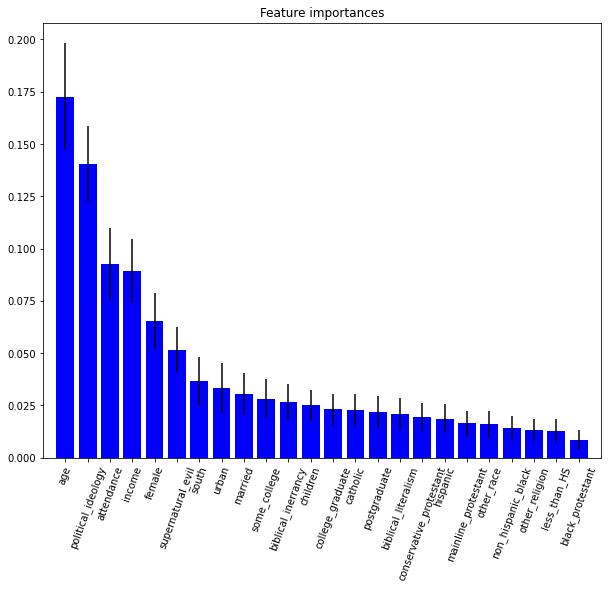

In [178]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances1[indices1],
        tick_label=[feature_cols[x] for x in indices1],
        color="blue", yerr=std1[indices1], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for Semi-Auto Weapons Ban, since it's 6th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, income and female are even better predictors than supernatural evil. Urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that black protestant, other religion, education less than high school, other race, mainline protestant, hispanic, conservative protestant and postgraduate are weak predictors for Semi-Auto Weapons Ban, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and banning semi-automatic weapons.

### 2) High-Capacity Magazine Ban

#### Find Best Decision Tree / Random Forest Estimator

In [179]:
high_capacity_magazine_ban_for_score = all_variables_q5.loc[:, 'high_capacity_magazine_ban']
high_capacity_magazine_ban_for_score

0       0
1       1
2       1
3       1
4       1
       ..
1567    1
1568    0
1569    1
1570    1
1571    1
Name: high_capacity_magazine_ban, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [180]:
magazine_ban_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
magazine_ban_classifier_tree_score = cross_val_score(magazine_ban_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           high_capacity_magazine_ban_for_score,
                           cv=10, scoring='accuracy')

magazine_ban_classifier_tree_score.mean()

0.6462952511489156

##### BaggingClassifier

In [181]:
magazine_ban_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

magazine_ban_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       high_capacity_magazine_ban_for_score)

magazine_ban_bagging_classifier.oob_score_

0.7181933842239185

##### RandomForestClassifier

In [182]:
magazine_ban_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
magazine_ban_forest_classifier_score = cross_val_score(magazine_ban_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         high_capacity_magazine_ban_for_score, cv=10)
magazine_ban_forest_classifier_score.mean()

0.7341288397968233

##### ExtraTreesClassifier

In [183]:
magazine_ban_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

magazine_ban_extra_trees_classifier_score = cross_val_score(magazine_ban_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], high_capacity_magazine_ban_for_score, cv=10)
magazine_ban_extra_trees_classifier_score.mean()  

0.716278319761348

##### AdaBoostClassifier

In [184]:
magazine_ban_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
magazine_ban_ada_boost_classifier_scores = cross_val_score(magazine_ban_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         high_capacity_magazine_ban_for_score, cv=10)
magazine_ban_ada_boost_classifier_scores.mean()

0.6889341288397968

##### XGBoost

In [185]:
magazine_ban_xgb = xgb.XGBRegressor()
magazine_ban_xgb.fit(indepent_variables_q5, high_capacity_magazine_ban_for_score)

magazine_ban_xgb_scores = cross_val_score(semi_automation_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], high_capacity_magazine_ban_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-magazine_ban_xgb_scores)
print(np.mean(-magazine_ban_xgb_scores))

[0.39170005 0.3835059  0.38262081 0.37186314 0.38888297 0.37889861
 0.38647755 0.35131876 0.38328218 0.34504042]
0.37635903848007674


##### LightGBM

In [186]:
magazine_ban_lgb = lgb.LGBMRegressor()
magazine_ban_lgb.fit(indepent_variables_q5, high_capacity_magazine_ban_for_score)

magazine_ban_lgb_score = cross_val_score(magazine_ban_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], high_capacity_magazine_ban_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-magazine_ban_lgb_score)
print(np.mean(-magazine_ban_lgb_score))

[0.35308898 0.35407645 0.37419821 0.36575256 0.36515344 0.34381684
 0.36265105 0.33618266 0.35706442 0.32804746]
0.3540032071805072


#### RandomForestClassifier & Importance of each predictor

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.

In [187]:
magazine_ban_forest_classifier.fit(indepent_variables_q5, high_capacity_magazine_ban_for_score)
importances2 = magazine_ban_forest_classifier.feature_importances_

std2 = np.std([tree.feature_importances_ for tree in magazine_ban_forest_classifier.estimators_], axis = 0)
indices2 = np.argsort(importances2)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices2[f], feature_cols[indices2[f]], importances2[indices2[f]]))

1. feature 18 age (0.182149)
2. feature 9 political_ideology (0.130808)
3. feature 19 income (0.096620)
4. feature 1 attendance (0.091508)
5. feature 13 female (0.057980)
6. feature 0 supernatural_evil (0.053397)
7. feature 22 urban (0.035173)
8. feature 23 south (0.032558)
9. feature 20 married (0.027963)
10. feature 3 biblical_inerrancy (0.027389)
11. feature 16 college_graduate (0.027017)
12. feature 15 some_college (0.026968)
13. feature 21 children (0.025888)
14. feature 7 catholic (0.023271)
15. feature 17 postgraduate (0.021119)
16. feature 4 conservative_protestant (0.020906)
17. feature 2 biblical_literalism (0.019496)
18. feature 5 mainline_protestant (0.018674)
19. feature 11 hispanic (0.017442)
20. feature 12 other_race (0.016546)
21. feature 10 non_hispanic_black (0.014101)
22. feature 8 other_religion (0.013193)
23. feature 14 less_than_HS (0.012442)
24. feature 6 black_protestant (0.007389)


* Plot the feature importances of the forest.

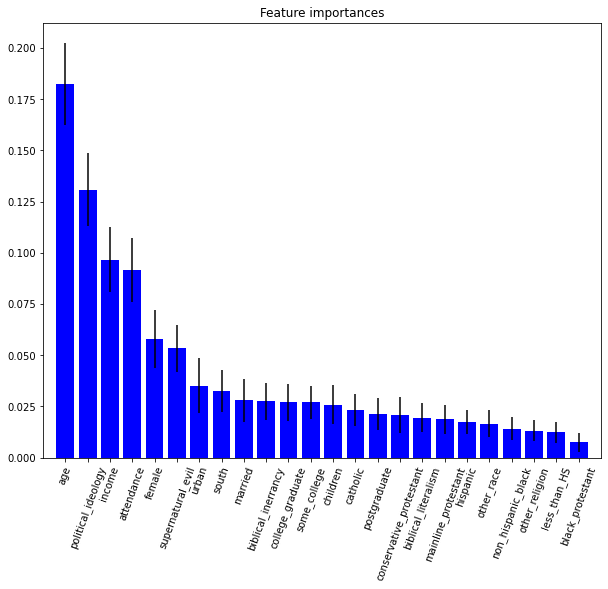

In [188]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances2[indices2],
        tick_label=[feature_cols[x] for x in indices2],
        color="blue", yerr=std2[indices2], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for High-Capacity Magazine Ban, since it's 6th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, attendance, income and female are even better predictors than supernatural evil. Urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that black protestant, non hispanic black, other religion, education less than high school, mainline protestant, hispanic, biblical literalism and postgraduate are weak predictors for High-Capacity Magazine Ban, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and banning High-Capacity Magazine.

### 3) Support for Concealed Carry

#### Find Best Decision Tree / Random Forest Estimator

In [189]:
concealed_carry_for_score = all_variables_q5.loc[:, 'support_for_concealed_carry']
concealed_carry_for_score

0       1
1       1
2       0
3       0
4       0
       ..
1567    0
1568    0
1569    0
1570    0
1571    0
Name: support_for_concealed_carry, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [190]:
concealed_carry_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
concealed_carry_classifier_tree_score = cross_val_score(concealed_carry_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           concealed_carry_for_score,
                           cv=10, scoring='accuracy')

concealed_carry_classifier_tree_score.mean()

0.5801378698701927

##### BaggingClassifier

In [191]:
concealed_carry_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

concealed_carry_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       concealed_carry_for_score)

concealed_carry_bagging_classifier.oob_score_

0.6374045801526718

##### RandomForestClassifier

In [192]:
concealed_carry_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
concealed_carry_forest_classifier_score = cross_val_score(concealed_carry_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         concealed_carry_for_score, cv=10)
concealed_carry_forest_classifier_score.mean() 

0.6603079900024188

##### ExtraTreesClassifier

In [193]:
concealed_carry_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

concealed_carry_extra_trees_classifier_score = cross_val_score(concealed_carry_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], concealed_carry_for_score, cv=10)
concealed_carry_extra_trees_classifier_score.mean()  

0.6290977989196161

##### AdaBoostClassifier

In [194]:
concealed_carry_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
concealed_carry_ada_boost_classifier_scores = cross_val_score(semi_automation_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         concealed_carry_for_score, cv=10)
concealed_carry_ada_boost_classifier_scores.mean()

0.6425098766427476

##### XGBoost

In [195]:
concealed_carry_xgb = xgb.XGBRegressor()
concealed_carry_xgb.fit(indepent_variables_q5, concealed_carry_for_score)

concealed_carry_xgb_scores = cross_val_score(concealed_carry_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], concealed_carry_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-concealed_carry_xgb_scores)
print(np.mean(-concealed_carry_xgb_scores))

[0.45495597 0.43583546 0.39928143 0.3983482  0.45843604 0.38056803
 0.43880517 0.41583586 0.46158081 0.41877282]
0.4262419767666243


##### LightGBM

In [196]:
concealed_carry_lgb = lgb.LGBMRegressor()
concealed_carry_lgb.fit(indepent_variables_q5, concealed_carry_for_score)

concealed_carry_lgb_score = cross_val_score(concealed_carry_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], concealed_carry_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-concealed_carry_lgb_score)
print(np.mean(-concealed_carry_lgb_score))

[0.41341053 0.41294113 0.38517367 0.38017695 0.43208483 0.38410871
 0.4106802  0.40926881 0.41954343 0.40843201]
0.4055820264402725


#### RandomForestClassifier - Importances

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations.

In [197]:
concealed_carry_forest_classifier.fit(indepent_variables_q5, concealed_carry_for_score)
importances3 = concealed_carry_forest_classifier.feature_importances_

std3 = np.std([tree.feature_importances_ for tree in concealed_carry_forest_classifier.estimators_], axis = 0)
indices3 = np.argsort(importances3)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices3[f], feature_cols[indices3[f]], importances3[indices3[f]]))

1. feature 18 age (0.172249)
2. feature 9 political_ideology (0.130521)
3. feature 19 income (0.096050)
4. feature 1 attendance (0.094439)
5. feature 0 supernatural_evil (0.062448)
6. feature 13 female (0.042279)
7. feature 22 urban (0.036449)
8. feature 20 married (0.033329)
9. feature 23 south (0.032838)
10. feature 15 some_college (0.028369)
11. feature 21 children (0.027279)
12. feature 3 biblical_inerrancy (0.026565)
13. feature 16 college_graduate (0.024965)
14. feature 7 catholic (0.023263)
15. feature 17 postgraduate (0.022287)
16. feature 4 conservative_protestant (0.020624)
17. feature 11 hispanic (0.019420)
18. feature 12 other_race (0.018289)
19. feature 2 biblical_literalism (0.018075)
20. feature 5 mainline_protestant (0.017352)
21. feature 10 non_hispanic_black (0.016354)
22. feature 8 other_religion (0.014533)
23. feature 14 less_than_HS (0.012203)
24. feature 6 black_protestant (0.009822)


* Plot the feature importances of the forest.

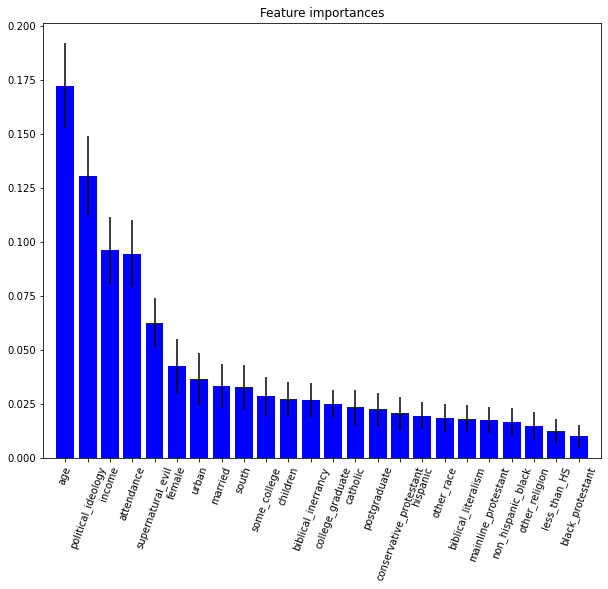

In [198]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances3[indices3],
        tick_label=[feature_cols[x] for x in indices3],
        color="blue", yerr=std3[indices3], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for Concealed Carry, since it's 5th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, income and attendance are even better predictors than supernatural evil. Female, urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, education less than high school, mainline protestant, biblical literalism and conservative protestant are weak predictors for support for Concealed Carry, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting for Concealed Carry.

### 4) More Armed Security at Schools

#### Find Best Decision Tree / Random Forest Estimator

In [199]:
security_at_schools_for_score = all_variables_q5.loc[:, 'more_armed_security_at_schools']
security_at_schools_for_score

0       1
1       1
2       1
3       1
4       1
       ..
1567    1
1568    0
1569    0
1570    0
1571    1
Name: more_armed_security_at_schools, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [200]:
security_at_schools_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
security_at_schools_classifier_tree_score = cross_val_score(security_at_schools_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           security_at_schools_for_score,
                           cv=10, scoring='accuracy')

security_at_schools_classifier_tree_score.mean()

0.5883778118197209

##### BaggingClassifier

In [201]:
security_at_schools_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

security_at_schools_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       security_at_schools_for_score)

security_at_schools_bagging_classifier.oob_score_

0.6513994910941476

##### RandomForestClassifier

In [202]:
security_at_schools_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
security_at_schools_forest_classifier_score = cross_val_score(security_at_schools_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         security_at_schools_for_score, cv=10)
security_at_schools_forest_classifier_score.mean() 

0.6799927436910425

##### ExtraTreesClassifier

In [203]:
security_at_schools_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

security_at_schools_extra_trees_classifier_score = cross_val_score(security_at_schools_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], security_at_schools_for_score, cv=10)
security_at_schools_extra_trees_classifier_score.mean()  

0.6615334999596871

##### AdaBoostClassifier

In [204]:
security_at_schools_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
security_at_schools_ada_boost_classifier_scores = cross_val_score(security_at_schools_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         security_at_schools_for_score, cv=12)
security_at_schools_ada_boost_classifier_scores.mean()

0.6437659033078881

##### XGBoost

In [205]:
security_at_schools_xgb = xgb.XGBRegressor()
security_at_schools_xgb.fit(indepent_variables_q5, security_at_schools_for_score)

security_at_schools_xgb_scores = cross_val_score(security_at_schools_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], security_at_schools_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-security_at_schools_xgb_scores)
print(np.mean(-security_at_schools_xgb_scores))

[0.41332445 0.40116435 0.46789766 0.40400629 0.43335337 0.43869137
 0.4059774  0.37201122 0.35891037 0.41807759]
0.4113414081229201


##### LightGBM

In [206]:
security_at_schools_lgb = lgb.LGBMRegressor()
security_at_schools_lgb.fit(indepent_variables_q5, security_at_schools_for_score)

security_at_schools_lgb_scores = cross_val_score(security_at_schools_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], security_at_schools_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-security_at_schools_lgb_scores)
print(np.mean(-security_at_schools_lgb_scores))

[0.37723314 0.39760846 0.41306125 0.39608664 0.42667821 0.42444523
 0.39094328 0.39095424 0.37282137 0.39812742]
0.3987959232446739


#### RandomForestClassifier & Importance of each predictor

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.

In [207]:
security_at_schools_classifier.fit(indepent_variables_q5, security_at_schools_for_score)
importances4 = security_at_schools_classifier.feature_importances_

std4 = np.std([tree.feature_importances_ for tree in security_at_schools_classifier.estimators_], axis = 0)
indices4 = np.argsort(importances4)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices4[f], feature_cols[indices4[f]], importances4[indices4[f]]))

1. feature 18 age (0.174591)
2. feature 9 political_ideology (0.108554)
3. feature 19 income (0.105989)
4. feature 1 attendance (0.093295)
5. feature 0 supernatural_evil (0.079717)
6. feature 22 urban (0.035566)
7. feature 13 female (0.033854)
8. feature 20 married (0.033040)
9. feature 23 south (0.032506)
10. feature 17 postgraduate (0.031717)
11. feature 3 biblical_inerrancy (0.026670)
12. feature 21 children (0.025229)
13. feature 15 some_college (0.025064)
14. feature 16 college_graduate (0.024225)
15. feature 7 catholic (0.024063)
16. feature 2 biblical_literalism (0.021941)
17. feature 5 mainline_protestant (0.021115)
18. feature 4 conservative_protestant (0.019576)
19. feature 11 hispanic (0.019019)
20. feature 12 other_race (0.018957)
21. feature 8 other_religion (0.014417)
22. feature 10 non_hispanic_black (0.013186)
23. feature 14 less_than_HS (0.010307)
24. feature 6 black_protestant (0.007403)


* Plot the feature importances of the forest.

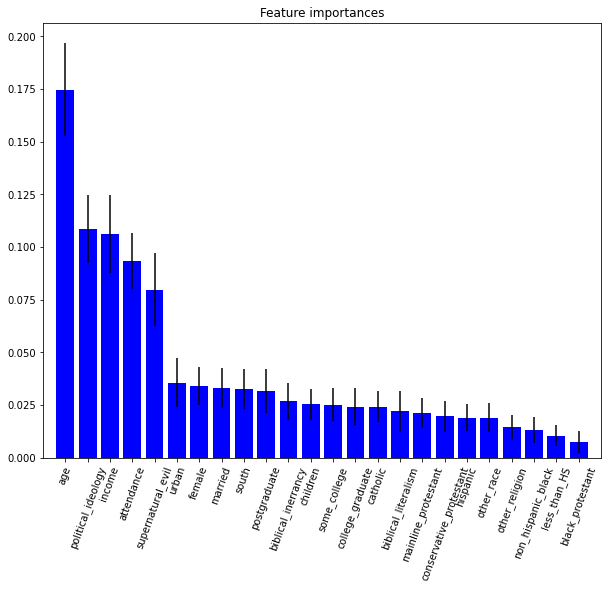

In [208]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances4[indices4],
        tick_label=[feature_cols[x] for x in indices4],
        color="blue", yerr=std4[indices4], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for More Armed Security at Schools, since it's 5th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, income and attendance are even better predictors than supernatural evil. Female, urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, education less than high school, mainline protestant, biblical literalism and conservative protestant are weak predictors for support for More Armed Security at Schools, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting for More Armed Security at Schools.

### 5) Civilian Hand Gun Possession Ban

#### Find Best Decision Tree / Random Forest Estimator

In [209]:
civilian_hand_gun_for_score = all_variables_q5.loc[:, 'civilian_hand_gun_possession_ban']
civilian_hand_gun_for_score

0       0
1       0
2       0
3       1
4       1
       ..
1567    1
1568    1
1569    1
1570    1
1571    1
Name: civilian_hand_gun_possession_ban, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [210]:
civilian_hand_gun_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
civilian_hand_gun_classifier_tree_score = cross_val_score(civilian_hand_gun_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           civilian_hand_gun_for_score,
                           cv=10, scoring='accuracy')

civilian_hand_gun_classifier_tree_score.mean()

0.641885027815851

##### BaggingClassifier

In [211]:
civilian_hand_gun_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

civilian_hand_gun_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       civilian_hand_gun_for_score)

civilian_hand_gun_bagging_classifier.oob_score_

0.7264631043256997

##### RandomForestClassifier

In [212]:
civilian_hand_gun_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
civilian_hand_gun_forest_classifier_score = cross_val_score(civilian_hand_gun_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         civilian_hand_gun_for_score, cv=10)
civilian_hand_gun_forest_classifier_score.mean() 

0.7226275900991695

##### ExtraTreesClassifier

In [213]:
civilian_hand_gun_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

civilian_hand_gun_extra_trees_classifier_score = cross_val_score(civilian_hand_gun_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], civilian_hand_gun_for_score, cv=10)
civilian_hand_gun_extra_trees_classifier_score.mean()  

0.7124284447311134

##### AdaBoostClassifier

In [214]:
civilian_hand_gun_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
civilian_hand_gun_ada_boost_classifier_scores = cross_val_score(civilian_hand_gun_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         civilian_hand_gun_for_score, cv=10)
civilian_hand_gun_ada_boost_classifier_scores.mean()

0.6952713053293558

##### XGBoost

In [215]:
civilian_hand_gun_xgb = xgb.XGBRegressor()
civilian_hand_gun_xgb.fit(indepent_variables_q5, civilian_hand_gun_for_score)

civilian_hand_gun_xgb_scores = cross_val_score(civilian_hand_gun_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], civilian_hand_gun_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-civilian_hand_gun_xgb_scores)
print(np.mean(-civilian_hand_gun_xgb_scores))

[0.36058113 0.37829986 0.36747805 0.35189311 0.35132437 0.34860448
 0.36658472 0.35306742 0.38260464 0.40060374]
0.3661041532858379


##### LightGBM

In [216]:
civilian_hand_gun_lgb = lgb.LGBMRegressor()
civilian_hand_gun_lgb.fit(indepent_variables_q5, civilian_hand_gun_for_score)

civilian_hand_gun_lgb_scores = cross_val_score(civilian_hand_gun_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], civilian_hand_gun_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-civilian_hand_gun_lgb_scores)
print(np.mean(-civilian_hand_gun_lgb_scores))

[0.33491698 0.36225941 0.33838201 0.34503321 0.35224952 0.33302309
 0.3708746  0.32539572 0.35541329 0.40744748]
0.3524995324529063


#### RandomForestClassifier & Importance of each predictor

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.


In [217]:
civilian_hand_gun_forest_classifier.fit(indepent_variables_q5, civilian_hand_gun_for_score)
importances5 = civilian_hand_gun_forest_classifier.feature_importances_

std5 = np.std([tree.feature_importances_ for tree in civilian_hand_gun_forest_classifier.estimators_], axis = 0)
indices5 = np.argsort(importances5)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices5[f], feature_cols[indices5[f]], importances5[indices5[f]]))

1. feature 18 age (0.171916)
2. feature 9 political_ideology (0.116126)
3. feature 19 income (0.096790)
4. feature 1 attendance (0.094787)
5. feature 0 supernatural_evil (0.064458)
6. feature 13 female (0.036180)
7. feature 22 urban (0.035783)
8. feature 23 south (0.033795)
9. feature 20 married (0.033455)
10. feature 3 biblical_inerrancy (0.028050)
11. feature 21 children (0.027184)
12. feature 15 some_college (0.026896)
13. feature 12 other_race (0.026263)
14. feature 16 college_graduate (0.024980)
15. feature 7 catholic (0.024172)
16. feature 11 hispanic (0.021368)
17. feature 17 postgraduate (0.021258)
18. feature 10 non_hispanic_black (0.020519)
19. feature 2 biblical_literalism (0.018772)
20. feature 4 conservative_protestant (0.017637)
21. feature 8 other_religion (0.016448)
22. feature 5 mainline_protestant (0.015677)
23. feature 14 less_than_HS (0.014470)
24. feature 6 black_protestant (0.013018)


* Plot the feature importances of the forest.

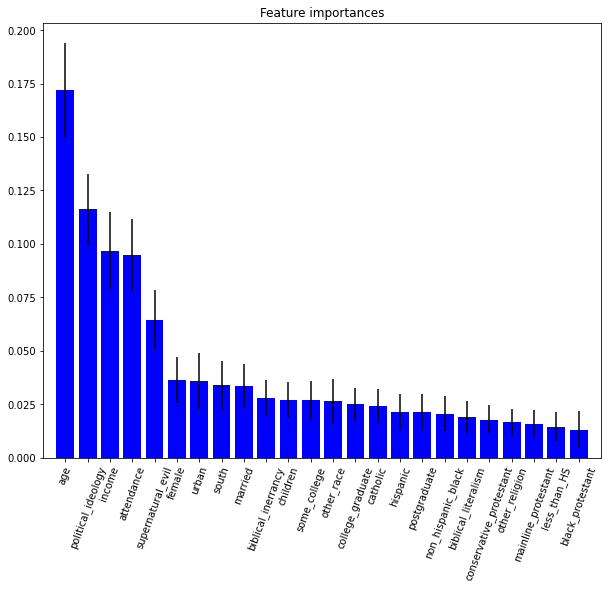

In [218]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances5[indices5],
        tick_label=[feature_cols[x] for x in indices5],
        color="blue", yerr=std5[indices5], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for Civilian Hand Gun Possession Ban, since it's 5th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, income and attendance are even better predictors than supernatural evil. Female, urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, education less than high school, mainline protestant, biblical literalism and conservative protestant are weak predictors for support for Civilian Hand Gun Possession Ban, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting Civilian Hand Gun Possession Ban.

### 6) More Teachers/Faculty with Guns

#### Find Best Decision Tree / Random Forest Estimator

In [219]:
teachers_staff_with_guns_for_score = all_variables_q5.loc[:, 'more_teachers_staff_with_guns']
teachers_staff_with_guns_for_score

0       1
1       0
2       0
3       0
4       1
       ..
1567    0
1568    0
1569    0
1570    0
1571    0
Name: more_teachers_staff_with_guns, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [220]:
teachers_guns_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
teachers_guns_classifier_tree_score = cross_val_score(teachers_guns_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           teachers_staff_with_guns_for_score,
                           cv=10, scoring='accuracy')

teachers_guns_classifier_tree_score.mean()

0.6405869547690075

##### BaggingClassifier

In [221]:
teachers_guns_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

teachers_guns_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       teachers_staff_with_guns_for_score)

teachers_guns_bagging_classifier.oob_score_

0.7188295165394402

##### RandomForestClassifier

In [222]:
teachers_guns_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
teachers_guns_forest_classifier_score = cross_val_score(teachers_guns_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         teachers_staff_with_guns_for_score, cv=5)
teachers_guns_forest_classifier_score.mean() 

0.7188231725811344

##### ExtraTreesClassifier

In [223]:
teachers_guns_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

teachers_guns_extra_trees_classifier_score = cross_val_score(teachers_guns_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], teachers_staff_with_guns_for_score, cv=10)
teachers_guns_extra_trees_classifier_score.mean()  

0.7093001693138756

##### AdaBoostClassifier

In [224]:
teachers_guns_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
teachers_guns_ada_boost_classifier_scores = cross_val_score(teachers_guns_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         teachers_staff_with_guns_for_score, cv=10)
teachers_guns_ada_boost_classifier_scores.mean()

0.6819600096750786

##### XGBoost

In [225]:
teachers_guns_xgb = xgb.XGBRegressor()
teachers_guns_xgb.fit(indepent_variables_q5, teachers_staff_with_guns_for_score)

teachers_guns_xgb_scores = cross_val_score(teachers_guns_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], teachers_staff_with_guns_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-teachers_guns_xgb_scores)
print(np.mean(-teachers_guns_xgb_scores))

[0.38072236 0.35227294 0.40329249 0.4233481  0.37374301 0.37519286
 0.35505878 0.37475197 0.38274661 0.39072004]
0.3811849175080025


##### LightGBM

In [226]:
teachers_guns_lgb = lgb.LGBMRegressor()
teachers_guns_lgb.fit(indepent_variables_q5, teachers_staff_with_guns_for_score)

teachers_guns_lgb_scores = cross_val_score(teachers_guns_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], teachers_staff_with_guns_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-teachers_guns_lgb_scores)
print(np.mean(-teachers_guns_lgb_scores))

[0.39118324 0.35467988 0.38892142 0.40971065 0.35275352 0.35209733
 0.31718617 0.36406602 0.36844783 0.36240932]
0.36614553920773185


#### RandomForestClassifier & Importance of each predictor


* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.


In [227]:
teachers_guns_forest_classifier.fit(indepent_variables_q5, teachers_staff_with_guns_for_score)
importances6 = teachers_guns_forest_classifier.feature_importances_

std6 = np.std([tree.feature_importances_ for tree in teachers_guns_forest_classifier.estimators_], axis = 0)
indices6 = np.argsort(importances6)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices6[f], feature_cols[indices6[f]], importances6[indices6[f]]))

1. feature 18 age (0.177897)
2. feature 9 political_ideology (0.126954)
3. feature 1 attendance (0.099293)
4. feature 19 income (0.094603)
5. feature 0 supernatural_evil (0.058523)
6. feature 13 female (0.041765)
7. feature 22 urban (0.036595)
8. feature 23 south (0.035900)
9. feature 20 married (0.033779)
10. feature 3 biblical_inerrancy (0.031181)
11. feature 15 some_college (0.029630)
12. feature 21 children (0.026784)
13. feature 4 conservative_protestant (0.025408)
14. feature 16 college_graduate (0.024336)
15. feature 2 biblical_literalism (0.022017)
16. feature 7 catholic (0.021113)
17. feature 17 postgraduate (0.020610)
18. feature 5 mainline_protestant (0.017791)
19. feature 11 hispanic (0.016711)
20. feature 12 other_race (0.015128)
21. feature 10 non_hispanic_black (0.012534)
22. feature 14 less_than_HS (0.011884)
23. feature 8 other_religion (0.011514)
24. feature 6 black_protestant (0.008051)


* Plot the feature importances of the forest.

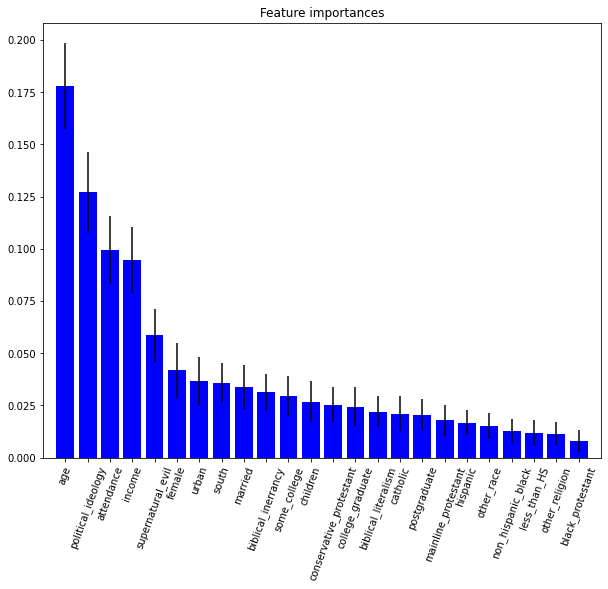

In [228]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances6[indices6],
        tick_label=[feature_cols[x] for x in indices6],
        color="blue", yerr=std6[indices6], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We can see that supernatural evil is a strong predictor of the support for More Teachers/Faculty with Guns, since it's 5th in line in the above plot, as we already saw with logistic and linear regressions previously.
* We also see that age, political ideology, income and attendance are even better predictors than supernatural evil. Female, urban, south and married are also strong predictors, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, other race, hispanic, biblical literalism and conservative protestant are weak predictors for support for More Teachers/Faculty with Guns, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting More Teachers/Faculty with Guns.

### 7) Required Gun Safety Programs

#### Find Best Decision Tree / Random Forest Estimator

In [229]:
gun_safety_programs_for_score = all_variables_q5.loc[:, 'required_gun_safety_programs']
gun_safety_programs_for_score

0       1
1       1
2       1
3       1
4       1
       ..
1567    1
1568    1
1569    1
1570    1
1571    1
Name: required_gun_safety_programs, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [230]:
gun_safety_programs_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
gun_safety_programs_classifier_tree_score = cross_val_score(gun_safety_programs_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           gun_safety_programs_for_score,
                           cv=10, scoring='accuracy')

gun_safety_programs_classifier_tree_score.mean()

0.8721277110376521

##### BaggingClassifier

In [231]:
gun_safety_programs_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

gun_safety_programs_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       gun_safety_programs_for_score)

gun_safety_programs_bagging_classifier.oob_score_

0.9249363867684478

##### RandomForestClassifier

In [232]:
gun_safety_programs_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
gun_safety_programs_classifier_score = cross_val_score(gun_safety_programs_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         gun_safety_programs_for_score, cv=12)
gun_safety_programs_classifier_score.mean()

0.9274809160305343

##### ExtraTreesClassifier

In [233]:
gun_safety_programs_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

gun_safety_programs_extra_trees_classifier_score = cross_val_score(gun_safety_programs_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], gun_safety_programs_for_score, cv=10)
gun_safety_programs_extra_trees_classifier_score.mean()  

0.9262114004676288

##### AdaBoostClassifier

In [234]:
gun_safety_programs_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
gun_safety_programs_ada_boost_classifier_scores = cross_val_score(gun_safety_programs_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         gun_safety_programs_for_score, cv=10)
gun_safety_programs_ada_boost_classifier_scores.mean()

0.9001249697653794

##### XGBoost

In [235]:
gun_safety_programs_xgb = xgb.XGBRegressor()
gun_safety_programs_xgb.fit(indepent_variables_q5, gun_safety_programs_for_score)

gun_safety_programs_xgb_scores = cross_val_score(gun_safety_programs_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], gun_safety_programs_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-gun_safety_programs_xgb_scores)
print(np.mean(-gun_safety_programs_xgb_scores))

[0.14335871 0.13632921 0.14848949 0.21985225 0.15357298 0.17813842
 0.19639757 0.13448221 0.17234606 0.1437815 ]
0.1626748415152683


##### LightGBM

In [236]:
gun_safety_programs_lgb = lgb.LGBMRegressor()
gun_safety_programs_lgb.fit(indepent_variables_q5, gun_safety_programs_for_score)

gun_safety_programs_lgb_score = cross_val_score(semi_automation_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], gun_safety_programs_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-gun_safety_programs_lgb_score)
print(np.mean(-gun_safety_programs_lgb_score))

[0.130393   0.13461677 0.14568049 0.19099023 0.13941915 0.17345357
 0.16596866 0.12691408 0.1390275  0.13609535]
0.14825588024107286


#### RandomForestClassifier & Importance of each predictor

* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.

In [237]:
gun_safety_programs_classifier.fit(indepent_variables_q5, gun_safety_programs_for_score)
importances7 = gun_safety_programs_classifier.feature_importances_

std7 = np.std([tree.feature_importances_ for tree in gun_safety_programs_classifier.estimators_], axis = 0)
indices7 = np.argsort(importances7)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices7[f], feature_cols[indices7[f]], importances7[indices7[f]]))

1. feature 18 age (0.184664)
2. feature 19 income (0.104225)
3. feature 9 political_ideology (0.101474)
4. feature 1 attendance (0.100897)
5. feature 0 supernatural_evil (0.056457)
6. feature 22 urban (0.038475)
7. feature 23 south (0.035877)
8. feature 13 female (0.035170)
9. feature 20 married (0.033575)
10. feature 16 college_graduate (0.030042)
11. feature 15 some_college (0.029554)
12. feature 21 children (0.028586)
13. feature 3 biblical_inerrancy (0.027485)
14. feature 7 catholic (0.023924)
15. feature 4 conservative_protestant (0.022649)
16. feature 5 mainline_protestant (0.022186)
17. feature 14 less_than_HS (0.021278)
18. feature 2 biblical_literalism (0.020917)
19. feature 17 postgraduate (0.020146)
20. feature 11 hispanic (0.017023)
21. feature 12 other_race (0.014749)
22. feature 10 non_hispanic_black (0.010647)
23. feature 8 other_religion (0.010593)
24. feature 6 black_protestant (0.009407)


* Plot the feature importances of the forest.

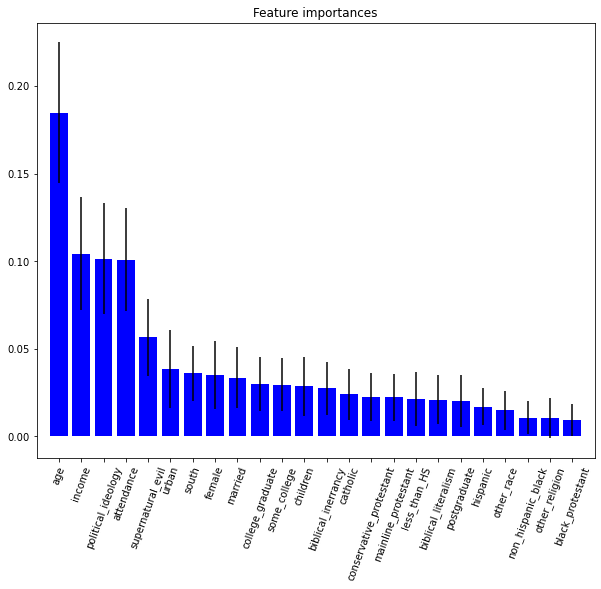

In [238]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances7[indices7],
        tick_label=[feature_cols[x] for x in indices7],
        color="blue", yerr=std7[indices7], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We see that age, income, political ideology and attendance are by far the strongest predictors of the support for Required Gun Safety Programs.
* We can see that supernatural evil is not as strong a predictor of the support for Required Gun Safety Programs as the aforementioned variables, since it's 5th in line in the above plot and has almost half of the importance of the 4th one.
* Female, urban, south and married are right after, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, black protestant, other religion, other race and hispanic are weak predictors for support for Required Gun Safety Programs, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting Required Gun Safety Programs.

### 8) Expanded Mental Health Screening

#### Find Best Decision Tree / Random Forest Estimator

In [239]:
mental_health_screening_for_score = all_variables_q5.loc[:, 'expanded_mental_health_screening']
mental_health_screening_for_score

0       1
1       1
2       1
3       1
4       1
       ..
1567    1
1568    1
1569    1
1570    1
1571    1
Name: expanded_mental_health_screening, Length: 1572, dtype: int64

##### DecisionTreeClassifier

In [240]:
mental_health_classifier_tree = DecisionTreeClassifier(random_state=0, criterion='entropy')
mental_health_classifier_tree_score = cross_val_score(mental_health_classifier_tree, 
                           indepent_variables_q5.loc[:, feature_cols], 
                           mental_health_screening_for_score,
                           cv=10, scoring='accuracy')

mental_health_classifier_tree_score.mean()

0.8269370313633798

##### BaggingClassifier

In [241]:
mental_health_bagging_classifier = BaggingClassifier(DecisionTreeClassifier(random_state=0), 
                                      n_estimators=100,
                                      oob_score=True,
                                      n_jobs=-1)

mental_health_bagging_classifier.fit(indepent_variables_q5.loc[:, feature_cols], 
                       mental_health_screening_for_score)

mental_health_bagging_classifier.oob_score_

0.8994910941475827

##### RandomForestClassifier

In [242]:
mental_health_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
mental_health_forest_classifier_score = cross_val_score(mental_health_forest_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         mental_health_screening_for_score, cv=5)
mental_health_forest_classifier_score.mean() 

0.9090324537458295

##### ExtraTreesClassifier

In [243]:
mental_health_extra_trees_classifier = ExtraTreesClassifier(n_estimators=100, 
                                     max_depth=None,
                                     min_samples_split=2)

mental_health_extra_trees_classifier_score = cross_val_score(semi_automation_extra_trees_classifier, indepent_variables_q5.loc[:, feature_cols], mental_health_screening_for_score, cv=10)
mental_health_extra_trees_classifier_score.mean()  

0.9020398290736111

##### AdaBoostClassifier

In [244]:
mental_health_ada_boost_classifier = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2), n_estimators=100)
mental_health_ada_boost_classifier_scores = cross_val_score(mental_health_ada_boost_classifier, indepent_variables_q5.loc[:, feature_cols], 
                         mental_health_screening_for_score, cv=10)
mental_health_ada_boost_classifier_scores.mean()

0.8759372732403451

##### XGBoost

In [245]:
mental_health_xgb = xgb.XGBRegressor()
mental_health_xgb.fit(indepent_variables_q5, mental_health_screening_for_score)

mental_health_xgb_scores = cross_val_score(semi_automation_xgb, 
                         indepent_variables_q5.loc[:, feature_cols], mental_health_screening_for_score, scoring="neg_mean_absolute_error", cv=10)
print(-mental_health_xgb_scores)
print(np.mean(-mental_health_xgb_scores))

[0.18458501 0.17854905 0.18383983 0.21371446 0.18826955 0.18799408
 0.2096744  0.18232733 0.19615595 0.16558452]
0.18906941699806992


##### LightGBM

In [246]:
mental_health_lgb = lgb.LGBMRegressor()
mental_health_lgb.fit(indepent_variables_q5, mental_health_screening_for_score)

mental_health_lgb_scores = cross_val_score(mental_health_lgb, 
                         indepent_variables_q5.loc[:, feature_cols], mental_health_screening_for_score,
                         scoring="neg_mean_absolute_error", cv=10)
print(-mental_health_lgb_scores)
print(np.mean(-mental_health_lgb_scores))

[0.17271213 0.16698004 0.17295989 0.20903154 0.1557956  0.16508725
 0.19168671 0.15215721 0.18164484 0.14874734]
0.17168025551854108


#### RandomForestClassifier & Importance of each predictor


* The best accuracy score was by using RandomForestClassifier, so we are going to use this for our calculations. We are going to obtain an overall summary of the importance of each predictor.

In [247]:
mental_health_forest_classifier.fit(indepent_variables_q5, mental_health_screening_for_score)
importances8 = mental_health_forest_classifier.feature_importances_

std8 = np.std([tree.feature_importances_ for tree in mental_health_forest_classifier.estimators_], axis = 0)
indices8 = np.argsort(importances8)[::-1]

for f in range(indepent_variables_q5.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices8[f], feature_cols[indices8[f]], importances8[indices8[f]]))

1. feature 18 age (0.186335)
2. feature 9 political_ideology (0.113171)
3. feature 1 attendance (0.100202)
4. feature 19 income (0.096347)
5. feature 0 supernatural_evil (0.051088)
6. feature 13 female (0.039547)
7. feature 22 urban (0.038738)
8. feature 23 south (0.037794)
9. feature 20 married (0.036420)
10. feature 21 children (0.033871)
11. feature 15 some_college (0.032248)
12. feature 16 college_graduate (0.030106)
13. feature 3 biblical_inerrancy (0.027693)
14. feature 4 conservative_protestant (0.023321)
15. feature 2 biblical_literalism (0.020802)
16. feature 5 mainline_protestant (0.020670)
17. feature 17 postgraduate (0.020108)
18. feature 7 catholic (0.019700)
19. feature 12 other_race (0.018999)
20. feature 11 hispanic (0.014407)
21. feature 8 other_religion (0.011819)
22. feature 14 less_than_HS (0.010090)
23. feature 10 non_hispanic_black (0.009135)
24. feature 6 black_protestant (0.007389)


* Plot the feature importances of the forest.

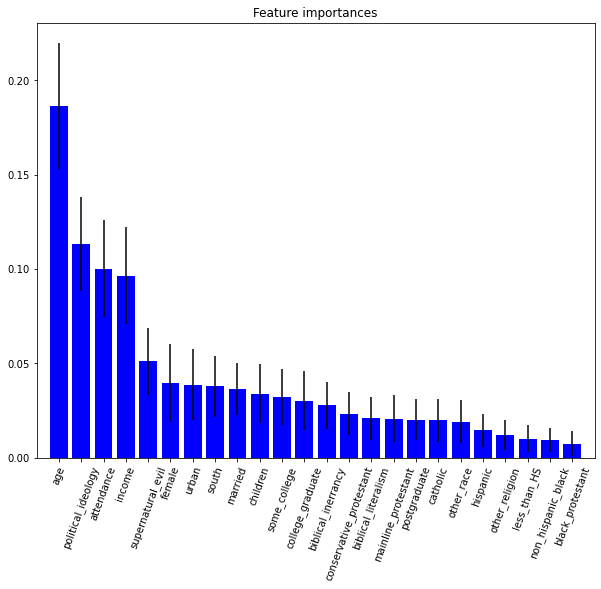

In [248]:
plt.figure(figsize=(10, 8))
plt.title("Feature importances")
plt.bar(range(indepent_variables_q5.shape[1]), importances8[indices8],
        tick_label=[feature_cols[x] for x in indices8],
        color="blue", yerr=std8[indices8], align="center")
plt.xlim([-1, indepent_variables_q5.shape[1]])
_ = plt.xticks(rotation=70)

#### Interpretation

* We see that age, political ideology, income and attendance are by far the strongest predictors of the support for Expanded Mental Health Screening.
* We can see that supernatural evil is not as strong a predictor of the support for Expanded Mental Health Screening as the aforementioned variables, since it's 5th in line in the above plot and has almost half of the importance of the 4th one.
* Female, urban, south and married are right after, confirming our results on logistic and linear regressions.
* Finally, we see that non hispanic black, black protestant, other religion, other race and less than high school are weak predictors for support for Expanded Mental Health Screening, confirming the findings on logistic regression. We saw on logistic regressors for these predictors that their p-value was greater than 0.05, and we couldn't conclude that there was a statistically significant association between them and supporting Expanded Mental Health Screening.